In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_results(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                parts = filename.split('_')
                domain = parts[0]
                topic = ' '.join(parts[1:-1])  
                edit_method = parts[-1].replace('.json', '')  

                results = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    df = df.set_index('edit_method').loc[edit_method_order_ls].reset_index()
    df_multi_hop = df_multi_hop.set_index('edit_method').loc[edit_method_order_ls].reset_index()
    # df['edit_method'] = pd.Categorical(df['edit_method'], order)
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df, df_multi_hop


model_name_ls = ["Llama2-7b", "llama3-8b", "mistral-7b"]
edit_method_order_ls = ['FT-L', 'FT-M', 'MEMIT', 'ROME', 'LoRA', 'ICL', 'GRACE']
# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
colors = sns.color_palette("Set2", n_colors=len(edit_method_order_ls))
# colors[-1] = sns.color_palette("husl", 8)[6] # Change the last color to the next one for better contrast
colors[-1] = sns.color_palette("hls", 8)[6]
colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#efef9e', '#cc9d9d']
# colors

In [8]:
# df_gemma, df_multi_hop_gemma = summarize_results("../results/gemma_1.1_2b_it")
df_llama2, df_multi_hop_llama2 = summarize_results("../results/llama_2_7b_chat_hf")
df_llama3, df_multi_hop_llama3 = summarize_results("../results/meta_llama_3_8b_instruct")
df_mistral, df_multi_hop_mistral = summarize_results("../results/mistral_7b_instruct_v0.3")
df_llama2.edit_method.unique()

array(['FT-L', 'FT-M', 'MEMIT', 'ROME', 'LoRA', 'ICL', 'GRACE'],
      dtype=object)

In [11]:
json_folder = "../results/meta_llama_3_8b_instruct" 
for filename in sorted(os.listdir(json_folder)):
    if filename.endswith('.json') and 'multi_turn' not in filename:
        parts = filename.split('_')
        domain = parts[0]
        topic = ' '.join(parts[1:-1])  
        edit_method = parts[-1].replace('.json', '')  
        print(f'domain {domain:<25} topic: {topic:<25} edit_method: {edit_method}')

## Efficacy

add border outline to each bar using the same colors as the filling color, only with alpha=0.7

In [ ]:
# bars (by domain)
def plot_efficacy(df, name):
    plt.figure(figsize=(15, 5))
    
    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    
    ax = sns.barplot(x='domain', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5, errorbar=None, zorder=2)
    
    # Add numbers on top of the bars with smaller font size
    # for i, bar in enumerate(ax.patches):
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width()/2., height,
    #             f'{height:.1f}',
    #             ha='center', va='bottom', rotation=0, fontsize=8)
    
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=len(colors))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()
plot_efficacy(df_llama2, 'llama_2_7b_domain')

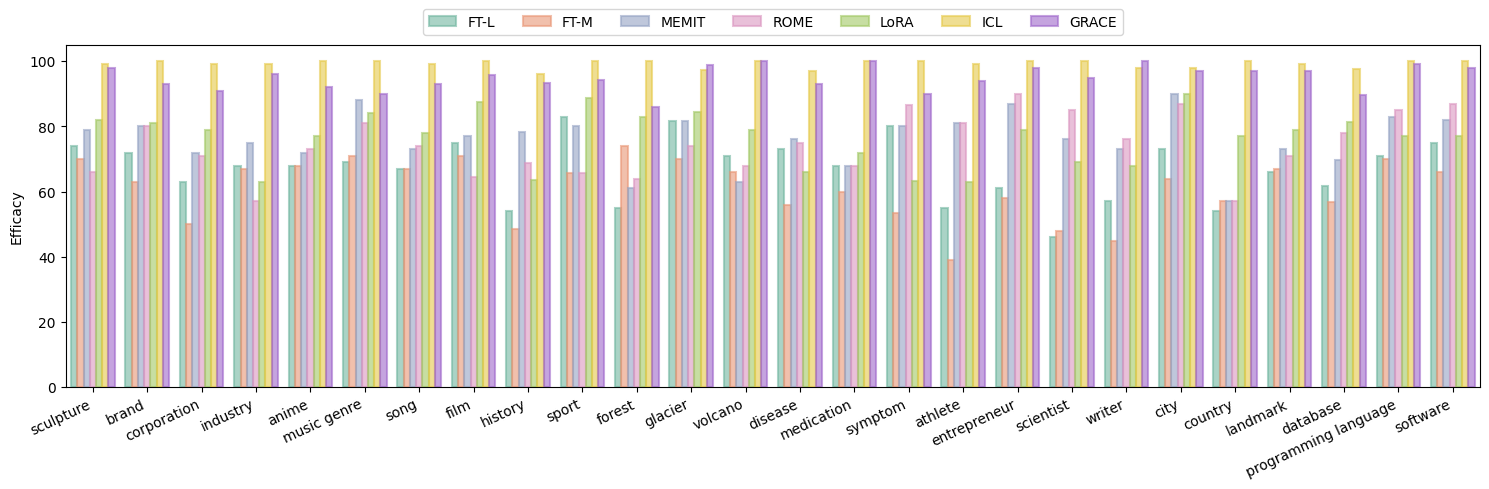

In [19]:
def plot_efficacy(df, name):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.6)

    # Add edgecolor to each bar using the same colors as the filling color
    for i, bar in enumerate(ax.patches):
        bar.set_edgecolor(bar.get_facecolor())
        bar.set_linewidth(1.5)
        # bar.set_alpha(0.9)

    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=df.edit_method.nunique())  # title='Edit Method',
    plt.xlabel('')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()


plot_efficacy(df_llama2, 'llama_2_7b')

In [ ]:
plot_efficacy(df_llama3, 'llama_3_8b')

In [ ]:
plot_efficacy(df_mistral, 'mistral_7b')

## Generalization

In [ ]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
df.head(2)

domain      topic edit_method  efficacy_pre  efficacy_post  rephrase_pre  \
0    art  sculpture        FT-L           0.0           47.0          12.0   
1    art  sculpture        FT-M           0.0           77.0          12.0   

   rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  mc_post  \
0           59.0     61.0      46.0    26.0     10.0    34.0     33.0   
1           74.0     61.0      61.0    26.0     23.0    34.0     33.0   

   reversed_pre  reversed_post  locality_post  
0           6.0            0.0           16.0  
1           6.0            2.0           53.0

Draw a dumbbell dot plot:
Across the x-axis there are 6 blocks: 'efficacy', 'rephrase',  'yes', 'no', 'mc', 'reversed'. Within each block use 7 colors for 7 edit methods.
y-axis show each metric value in a vertical dumbbell dot plot, which one dot for pre- and one for post- metric.
the input dataframe has following columns: 'topic', 'edit_method', 'efficacy_pre', 'efficacy_post', 'rephrase_pre', 'rephrase_post', 'yes_pre', 'yes_post', 'no_pre', 'no_post', 'mc_pre', 'mc_post', 'reversed_pre', 'reversed_post'

Draw 3 subplots, each for one model, and each dumbbell plot show the metrics for the average of the entire dataframe (model)

In [ ]:
# 3 by 3 = 9 domains
def plot_dumbbell_by_domain(df):
    # Set up the plot
    fig, axes = plt.subplots(3, 3, figsize=(30, 30))
    # sns.set_style("whitegrid")

    # Define colors for each edit method
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Get unique domains
    domains = df['domain'].unique()

    for idx, domain in enumerate(domains):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        domain_data = df[df['domain'] == domain]

        # Plot dumbbell for each edit method and metric
        for i, method in enumerate(edit_methods):
            method_data = domain_data[domain_data['edit_method'] == method]
            
            for j, metric in enumerate(metrics):
                pre_col = f'{metric}_pre'
                post_col = f'{metric}_post'
                
                if pre_col in method_data.columns and post_col in method_data.columns:
                    pre_value = method_data[pre_col].values[0]
                    post_value = method_data[post_col].values[0]
                    
                    ax.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                            [pre_value, post_value], 
                            color=colors[i], alpha=0.3, linewidth=10)
                    ax.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                    ax.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

        # Customize the subplot
        ax.set_xlabel('Metrics', fontsize=12)
        ax.set_ylabel('Values', fontsize=12)
        ax.set_title(f'{domain.capitalize()}', fontsize=14)

        # Set x-ticks and labels
        ax.set_xticks(x_positions)
        ax.set_xticklabels(metrics, fontsize=10, rotation=45)

        # Set y-axis limit
        ax.set_ylim(0, 100)

    # Add legend to the figure
    # fig.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 0.5), loc='center left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell_by_domain(df_llama2)

Use the color of lines to distinguish edit_method, change dot color to distinguish pre- and post- metric
Remove the border/outline of the figure, instead draw outline box (with ticks) for each metric

In [ ]:
def plot_dumbbell_single(df):
    plt.figure(figsize=(20, 10))

    # Define colors for each edit method
    line_colors = colors
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Calculate the average metric across all models grouped by method
    avg_data = df.groupby('edit_method').mean()

    # Plot dumbbell for each edit method and metric
    for i, method in enumerate(edit_methods):
        method_data = avg_data.loc[method]
        
        for j, metric in enumerate(metrics):
            pre_col = f'{metric}_pre'
            post_col = f'{metric}_post'
            
            if pre_col in method_data.index and post_col in method_data.index:
                pre_value = method_data[pre_col]
                post_value = method_data[post_col]
                
                plt.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                        [pre_value, post_value], 
                        color=line_colors[i], alpha=0.3, linewidth=10, solid_capstyle='round')
                plt.scatter(x_positions[j] + i * 0.25, pre_value, color='grey', s=50, zorder=10, alpha=0.5)
                plt.scatter(x_positions[j] + i * 0.25, post_value, color=line_colors[i], s=50, zorder=10, alpha=0.8)

    # Customize the plot
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Dumbbell Plot of Average Pre and Post Metrics for Different Edit Methods', fontsize=16)

    # Set x-ticks and labels
    plt.xticks([x + (len(edit_methods) - 1) * 0.125 for x in x_positions], metrics, fontsize=12)

    # Add legend with only colors for edit methods
    handles = [plt.Line2D([0], [0], color=line_colors[i], lw=4) for i in range(len(edit_methods))]
    plt.legend(handles, edit_methods, title='Edit Methods', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Add y-axis ticks
    plt.yticks(range(0, 101, 20))

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell_single(df_llama3)

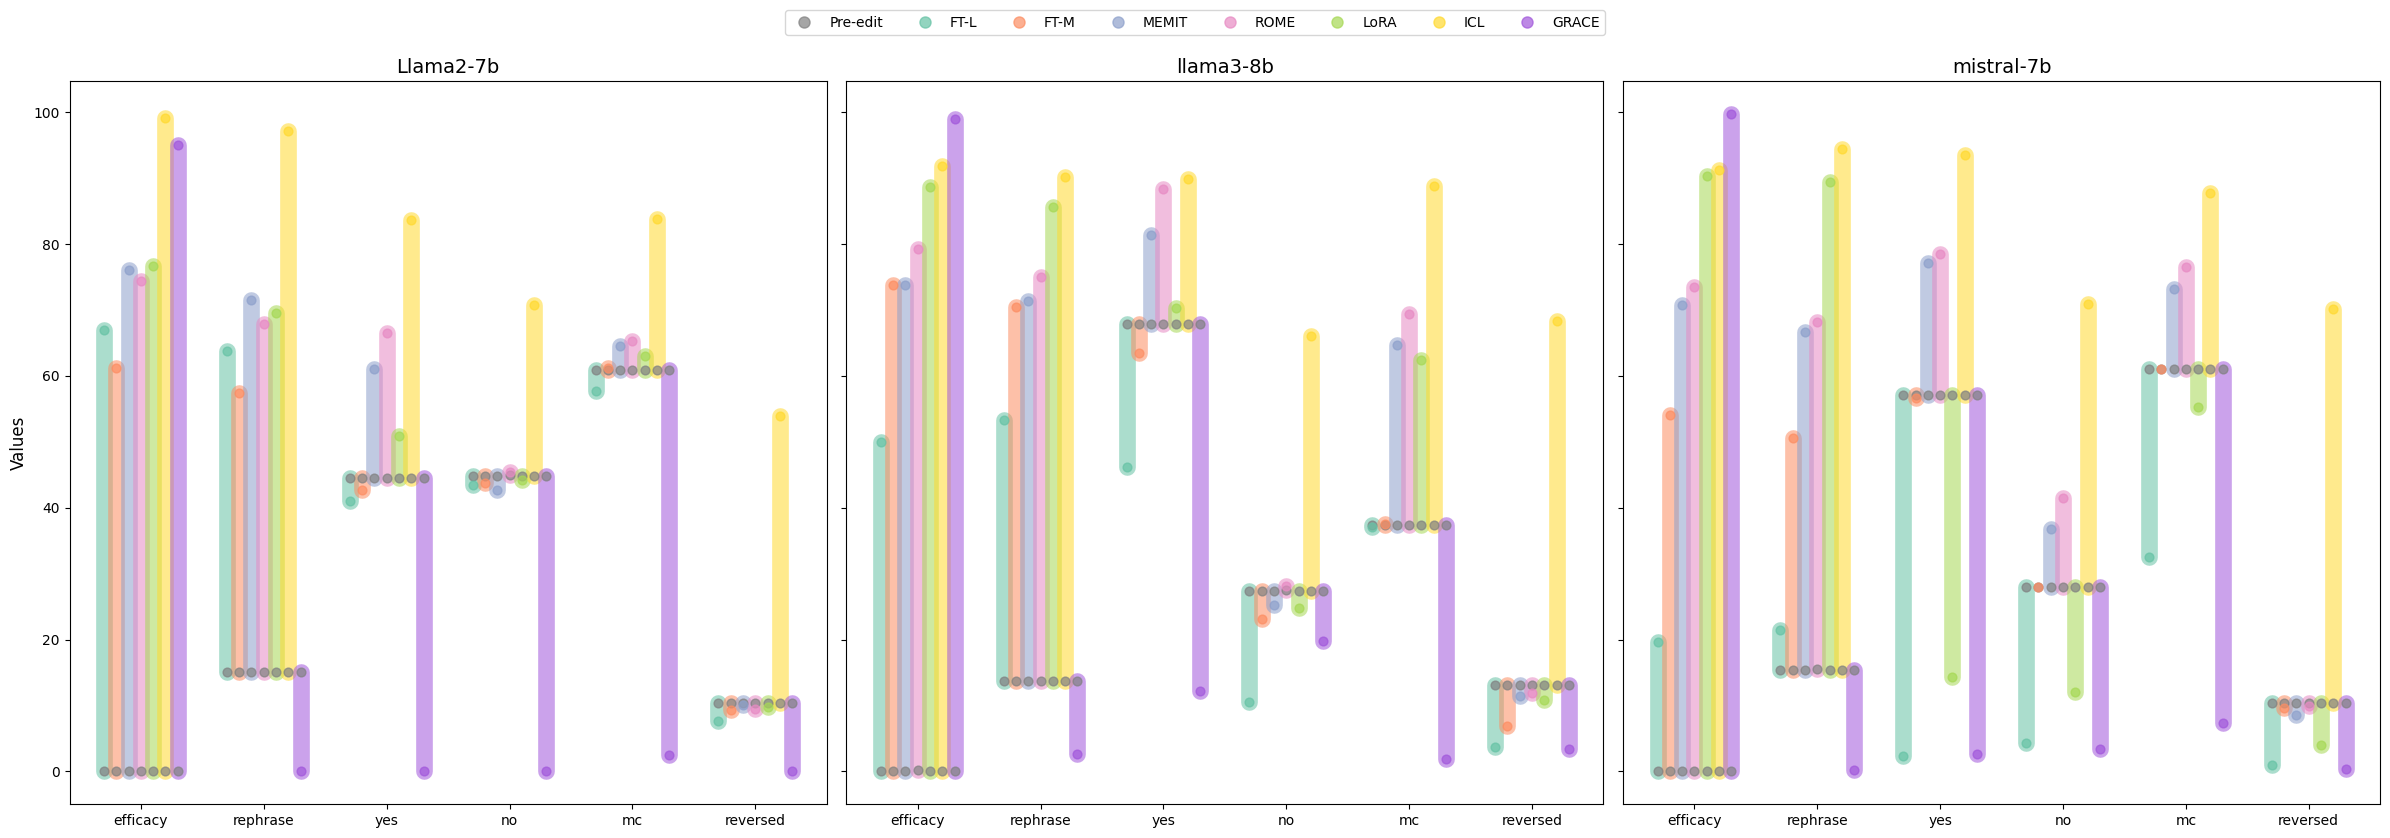

In [18]:
def plot_dumbbell_by_model(dataframes, model_names, fig_name):
    num_models = len(dataframes)
    fig, axes = plt.subplots(1, num_models, figsize=(24, 8), sharey=True)
    
    if num_models == 1:
        axes = [axes]

    line_colors = colors
    
    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    for idx, df in enumerate(dataframes):
        ax = axes[idx]
        edit_methods = df['edit_method'].unique()
        
        # Calculate the average metric across all models grouped by method
        avg_data = df.groupby('edit_method').mean()

        # Plot dumbbell for each edit method and metric
        for i, method in enumerate(edit_methods):
            method_data = avg_data.loc[method]
            
            for j, metric in enumerate(metrics):
                pre_col = f'{metric}_pre'
                post_col = f'{metric}_post'
                
                if pre_col in method_data.index and post_col in method_data.index:
                    pre_value = method_data[pre_col]
                    post_value = method_data[post_col]
                    
                    # Increase vertical spacing by adjusting the x-position
                    x_offset = x_positions[j] + i * 0.4
                    
                    ax.plot([x_offset, x_offset], 
                            [pre_value, post_value], 
                            color=line_colors[i], alpha=0.55, linewidth=8, solid_capstyle='round')
                    ax.scatter(x_offset, pre_value, color='grey', s=40, zorder=10, alpha=0.7)
                    ax.scatter(x_offset, post_value, color=line_colors[i], s=40, zorder=10, alpha=0.7)

        # Customize the plot
        # ax.set_xlabel('Metrics', fontsize=12)
        if idx == 0:
            ax.set_ylabel('Values', fontsize=12)
        ax.set_title(f'{model_names[idx]}', fontsize=14)

        # Set x-ticks and labels
        ax.set_xticks([x + (len(edit_methods) - 1) * 0.2 for x in x_positions])
        ax.set_xticklabels(metrics, fontsize=10)  # , rotation=45, ha='right'

        # Add y-axis ticks
        ax.set_yticks(range(0, 101, 20))

    # Add legend with only colors for edit methods
    handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=8, linestyle='', alpha=0.7)]
    handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=8, linestyle='', alpha=0.7) for i in range(len(edit_methods))]
    fig.legend(handles, ['Pre-edit'] + edit_methods.tolist(), bbox_to_anchor=(0.5, 1.05), ncol=len(edit_methods) + 1, loc='upper center')  # , title='Edit Methods'

    # Adjust layout and display the plot
    plt.tight_layout()
    # plt.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf')
    plt.show()


plot_dumbbell_by_model([df_llama2, df_llama3, df_mistral], model_name_ls, '3models')
# plot_dumbbell_by_model([df_llama2, df_llama3], model_name_ls[:2], '2models')

In [ ]:
def plot_generalization_by_model_and_domain(dataframes, model_names, fig_name):
    num_models = len(dataframes)
    fig, axes = plt.subplots(3, 2, figsize=(24, 24), sharey='row')
    
    line_colors = colors
    
    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]
    domains = ['places', 'human']

    for model_idx, df in enumerate(dataframes):
        edit_methods = df['edit_method'].unique()
        
        for domain_idx, domain in enumerate(domains):
            ax = axes[model_idx, domain_idx]
            domain_df = df[df['domain'] == domain]
            
            # Calculate the average metric across all models grouped by method
            avg_data = domain_df.groupby('edit_method').mean()

            # Plot dumbbell for each edit method and metric
            for i, method in enumerate(edit_methods):
                method_data = avg_data.loc[method]
                
                for j, metric in enumerate(metrics):
                    pre_col = f'{metric}_pre'
                    post_col = f'{metric}_post'
                    
                    if pre_col in method_data.index and post_col in method_data.index:
                        pre_value = method_data[pre_col]
                        post_value = method_data[post_col]
                        
                        # Increase vertical spacing by adjusting the x-position
                        x_offset = x_positions[j] + i * 0.4
                        
                        ax.plot([x_offset, x_offset], 
                                [pre_value, post_value], 
                                color=line_colors[i], alpha=0.55, linewidth=12, solid_capstyle='round')
                        ax.scatter(x_offset, pre_value, color='grey', s=40, zorder=10, alpha=0.7)
                        ax.scatter(x_offset, post_value, color=line_colors[i], s=40, zorder=10, alpha=0.7)

            # Customize the plot
            # if domain_idx == 0:
            #     ax.set_ylabel('Values', fontsize=12)
            if model_idx == 0:
                ax.set_title(f'{domain.capitalize()}', fontsize=14)
            # if model_idx == 2:
                # ax.set_xlabel('Metrics', fontsize=12)

            # Set x-ticks and labels
            ax.set_xticks([x + (len(edit_methods) - 1) * 0.2 for x in x_positions])
            ax.set_xticklabels(metrics, fontsize=10) # , rotation=45, ha='right'

            # Add y-axis ticks
            ax.set_yticks(range(0, 101, 20))

            # Add model name to the left of each row
            if domain_idx == 0:
                # ax.text(-0.05, 0.5, model_names[model_idx], rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=14)
                ax.text(-0.05, 0.5, 'Generalization Score', rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=14)

    # Add legend with only colors for edit methods
    handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=8, linestyle='', alpha=0.7)]
    handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=8, linestyle='', alpha=0.7) for i in range(len(edit_methods))]
    fig.legend(handles, ['Pre-edit'] + edit_methods.tolist(), bbox_to_anchor=(0.5, 1.01), ncol=len(edit_methods) + 1, loc='upper center')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf', bbox_inches='tight')
    
    plt.show()

plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_2domains')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'size': 26}
rc('font', **font)
plt.rcParams.update({'font.size': 26})

# if domain_idx == 0:
#                 # ax.text(-0.05, 0.5, model_names[model_idx], rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=14)
#                 ax.text(-0.05, 0.5, 'Generalization Score', rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=14)

def plot_generalization_by_model_and_domain(dataframes, model_names, fig_name):
    num_models = len(dataframes)
    # fig, axes = plt.subplots(3, 2, figsize=(24, 30), sharey='row')
    fig, axes = plt.subplots(3, 2, figsize=(24, 24), sharey='row')
    
    # colors = ['blue', 'green', 'red', 'cyan', 'magenta', '#F0E442', 'brown']
    colors_1 = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
    colors_2 = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#efef9e', '#cc9d9d']

    line_colors = colors_2
    
    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]
    domains = ['places', 'human']

    j = 0

    for model_idx, df in enumerate(dataframes):
        edit_methods = df['edit_method'].unique()
        
        for domain_idx, domain in enumerate(domains):
            ax = axes[model_idx, domain_idx]
            domain_df = df[df['domain'] == domain]
            
            # Calculate the average metric across all models grouped by method
            avg_data = domain_df.groupby('edit_method').mean()

            # Plot dumbbell for each edit method and metric
            for i, method in enumerate(edit_methods):
                method_data = avg_data.loc[method]
                
                for j, metric in enumerate(metrics):
                    pre_col = f'{metric}_pre'
                    post_col = f'{metric}_post'
                    
                    if pre_col in method_data.index and post_col in method_data.index:
                        pre_value = method_data[pre_col]
                        post_value = method_data[post_col]
                        
                        # Increase vertical spacing by adjusting the x-position
                        x_offset = x_positions[j] + i * 0.54
                        
                        # ax.plot([x_offset, x_offset], 
                        #         [pre_value, post_value], 
                        #         color=line_colors[i], alpha=0.55, linewidth=12, solid_capstyle='round')
                        # ax.scatter(x_offset, pre_value, color='grey', s=40, zorder=10, alpha=0.7)
                        # ax.scatter(x_offset, post_value, color=line_colors[i], s=40, zorder=10, alpha=0.7)

                        ax.plot([x_offset, x_offset], 
                                [pre_value, post_value], 
                                color=line_colors[i], alpha=1, linewidth=17, solid_capstyle='round')
                        # ax.scatter(x_offset, post_value, color=line_colors[i], s=40, zorder=10, alpha=1)
                        ax.scatter(x_offset, pre_value, color='grey', s=100, zorder=10, alpha=1)



            # Customize the plot
            # if domain_idx == 0:
            #     ax.set_ylabel('Values', fontsize=12)
            # if model_idx == 0:
            #     ax.set_title(f'{domain.capitalize()}', fontsize=14)
            # if model_idx == 0:
            #     ax.set_title(f'{domain.capitalize()}', fontsize=26)
            # if model_idx == 2:
                # ax.set_xlabel('Metrics', fontsize=12)
                        
            if domain_idx == 0:
                # ax.text(-0.05, 0.5, model_names[model_idx], rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=14)
                ax.text(-0.05, 0.5, 'Generalization Score (%)', rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=26)

            else:
                ax.spines['left'].set_visible(False)


            # Set x-ticks and labels
            # ax.set_xticks([x + (len(edit_methods) - 1) * 0.2 for x in x_positions])
            ax.set_xticks([x + (len(edit_methods) - 1) * 0.25 for x in x_positions])
            ax.set_xticklabels(metrics, fontsize=26) # , rotation=45, ha='right'

            # Add y-axis ticks
            ax.set_yticks(range(0, 101, 20))

            # Add model name to the left of each row
            # if domain_idx == 0:
            #     ax.text(-0.05, 0.5, model_names[model_idx], rotation=90, 
            #             transform=ax.transAxes, va='center', ha='right', fontsize=16)

    # line_colors = colors_1

    # Add legend with only colors for edit methods
    # handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=8, linestyle='', alpha=0.7)]
    # handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=8, linestyle='', alpha=0.7) for i in range(len(edit_methods))]
    # handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=8, linestyle='', alpha=1)]
    # handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=8, linestyle='', alpha=1)]
    # handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=8, linestyle='', alpha=1) for i in range(len(edit_methods))]


            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            # ax.spines['left'].set_visible(False)
            # if j % 2 == 0:
            #     ax.spines['left'].set_visible(False)
            #     j = j+1
            # else:
            #     j = j+1

            ax.axhline(y=0.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=20.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=40.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=60.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=80.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=100.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)

    handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=18, linestyle='', alpha=1)]
    handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=18, linestyle='', alpha=1) for i in range(len(edit_methods))]


    fig.legend(handles, ['Pre-edit'] + edit_methods.tolist(), bbox_to_anchor=(0.5, 1.02), ncol=len(edit_methods) + 1, loc='upper center')

    # Adjust layout and display the plot
    # plt.tight_layout()

    # plt.tight_layout()
    # # plt.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf', bbox_inches='tight')
    # plt.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf')
    # plt.show()

    fig.tight_layout()
    # plt.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf', bbox_inches='tight')
    fig.savefig(f'../results/figs/plot_generalization_{fig_name}.pdf', bbox_inches='tight')
    fig.show()

plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_2domains')

## Locality

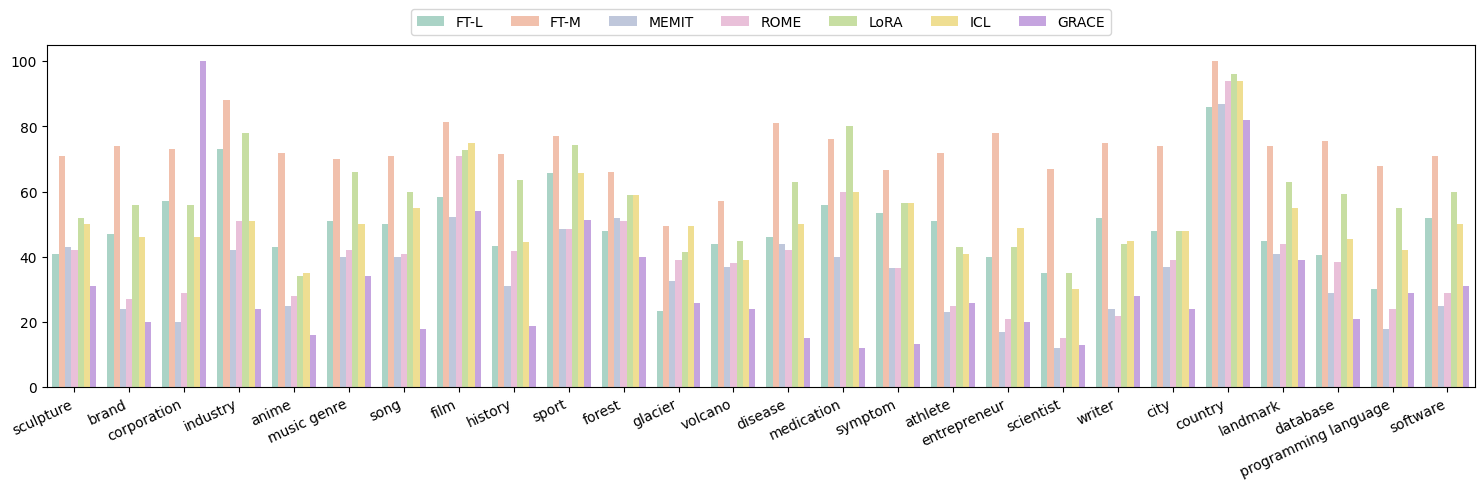

In [82]:
def plot_locality(df, name):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x='topic', y='locality_post', hue='edit_method', data=df, palette=colors, alpha=0.6)

    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=df.edit_method.nunique())  # title='Edit Method',
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    # plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()

plot_locality(df_llama2, 'llama2')

In [ ]:
def plot_locality(df, name):
    plt.figure(figsize=(15, 5))
    ax = sns.lineplot(x='topic', y='locality_post', hue='edit_method', data=df, palette=colors, alpha=0.6, marker='o')
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=df.edit_method.nunique())  # title='Edit Method',
    # plt.xlabel('')
    # plt.ylabel('')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    
    # Adjust x-axis limits to reduce space on both sides
    # ax.set_xlim(-0.5, len(df['topic'].unique()) - 0.5)
    
    # plt.tight_layout()
    
    # Use Figure.savefig with bbox_inches='tight' to avoid the deprecation warning
    plt.savefig(f'../results/figs/plot_locality_{name}.pdf')
    plt.show()

plot_locality(df_llama2, 'llama2')

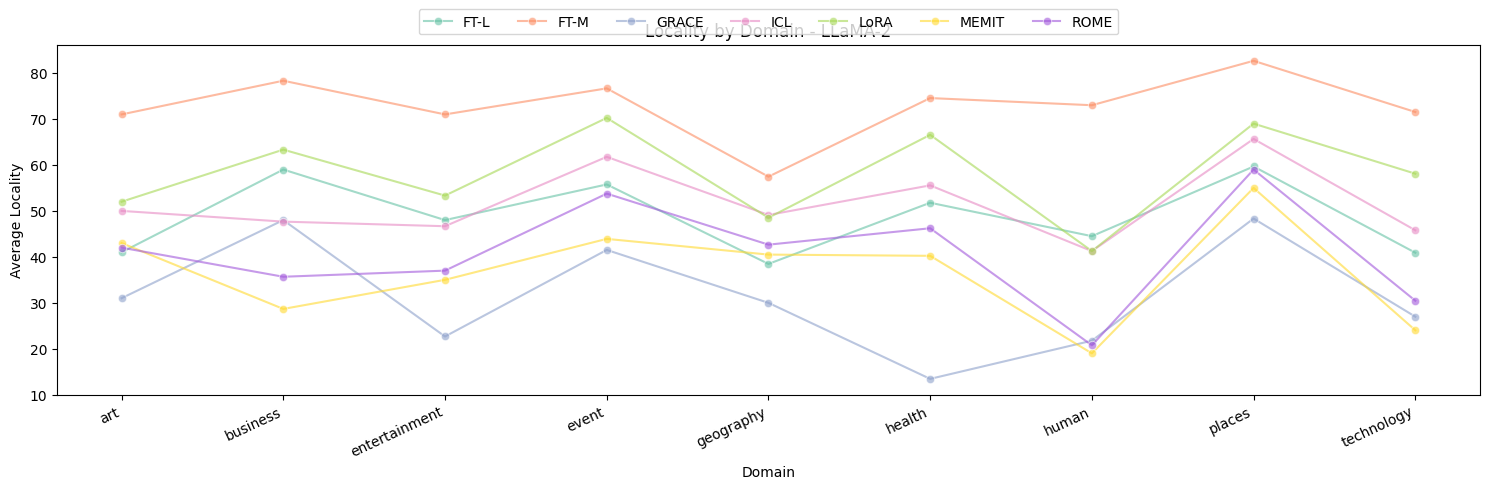

In [109]:
def plot_locality_by_domain(df, name):
    plt.figure(figsize=(15, 5))
    
    # Group by domain and edit_method, then calculate mean locality_post
    df_grouped = df.groupby(['domain', 'edit_method'])['locality_post'].mean().reset_index()
    
    ax = sns.lineplot(x='domain', y='locality_post', hue='edit_method', data=df_grouped, palette=colors, alpha=0.6, marker='o')
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=df.edit_method.nunique())
    plt.xlabel('Domain')
    plt.ylabel('Average Locality')
    plt.title(f'Locality by Domain - {name}')
    plt.xticks(rotation=25, ha='right')
    
    plt.tight_layout()
    # plt.savefig(f'../results/figs/plot_locality_by_domain_{name}.pdf')
    plt.show()

plot_locality_by_domain(df_llama2, 'LLaMA-2')

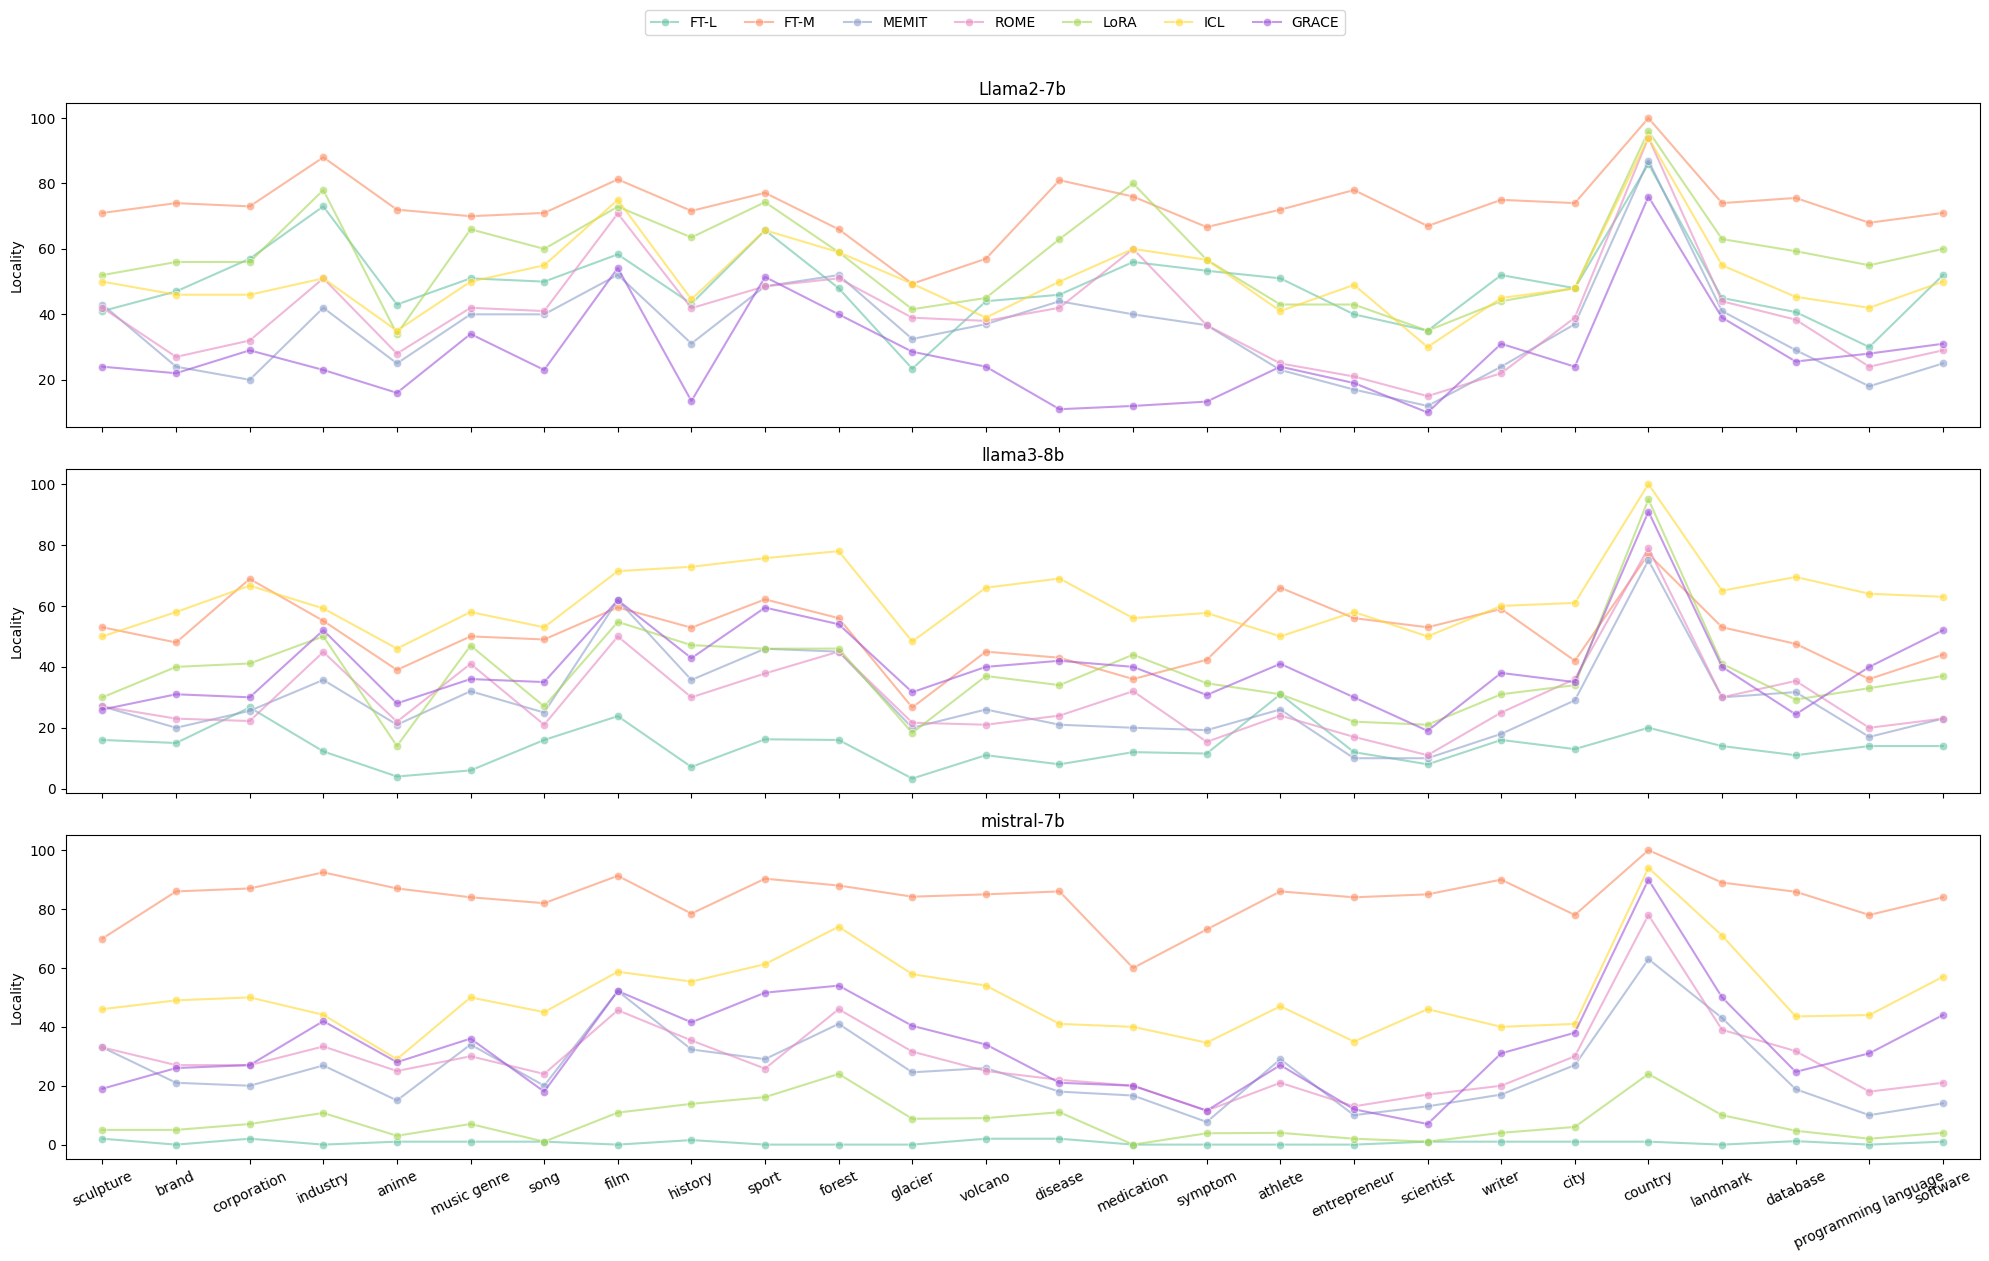

In [24]:
def plot_locality(df_list, model_names):
    num_models = len(df_list)
    fig, axes = plt.subplots(num_models, 1, figsize=(20, 4*num_models), sharex=True)
    
    for i, (df, name) in enumerate(zip(df_list, model_names)):
        ax = axes[i] if num_models > 1 else axes
        sns.lineplot(x='topic', y='locality_post', hue='edit_method', data=df, palette=colors, alpha=0.6, marker='o', ax=ax)
        ax.set_title(name)
        ax.set_xlabel('')
        ax.set_ylabel('Locality')
        ax.set_xlim(-0.5, len(df['topic'].unique()) - 0.5)
        ax.tick_params(axis='x', rotation=25)
        
        # if i < num_models - 1:
        ax.legend().remove()
    
    # Add a single legend for all subplots
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=df_list[0].edit_method.nunique())
    
    plt.tight_layout()
    plt.show()

plot_locality([df_llama2, df_llama3, df_mistral], model_name_ls)

## Robustness Multi-turn

Traverse files in a folder, file name is in domain_topic_edit-method_type.json format. draw a line chart for each file, and arrange them as subplots

Plot line charts for df_multi_turn, each domain as a subplot, where each line is a edit method (pre-edit and post-edit)

In [30]:
# Load and process data
folder_paths = [
    '../results/meta_llama_3_8b_instruct_multi_turn',
    '../results/mistral_7b_instruct_v0.3_multi_turn',
    '../results/llama_2_7b_chat_hf_multi_turn'
]

data = []
for folder_path in folder_paths:
    model_name = folder_path.split('/')[-1].replace('_multi_turn', '')
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            domain, topic, edit_method, type_ = parts[0], ' '.join(parts[1:-2]), parts[-2], parts[-1].replace('.json', '')
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            pre_edit_multi_turn_acc = [e['pre']['edit_acc_multi_turn'] for e in metrics]
            post_edit_multi_turn_acc = [e['post']['edit_acc_multi_turn'] for e in metrics]
            
            data.append({
                'model': model_name,
                'domain': domain,
                'topic': topic,
                'edit_method': edit_method,
                'type_': type_,
                'pre_edit_multi_turn_acc': np.mean(pre_edit_multi_turn_acc, axis=0)[1:],
                'post_edit_multi_turn_acc': np.mean(post_edit_multi_turn_acc, axis=0)[1:]
            })

df_multi_turn = pd.DataFrame(data)
df_multi_turn = df_multi_turn[df_multi_turn['type_'] == 'yes']

same_pre_data_topics = {}

for model in df_multi_turn['model'].unique():
    model_data = df_multi_turn[df_multi_turn['model'] == model]
    same_pre_data_topics[model] = []

    for topic in model_data['topic'].unique():
        topic_data = model_data[model_data['topic'] == topic]
        pre_data_list = []

        for edit_method in topic_data['edit_method'].unique():
            method_data = topic_data[topic_data['edit_method'] == edit_method]
            for _, row in method_data.iterrows():
                pre_data = tuple(row['pre_edit_multi_turn_acc'])  # Convert to tuple for hashability
                pre_data_list.append(pre_data)

        if len(set(pre_data_list)) == 1:  # All pre_data are the same across edit methods
            same_pre_data_topics[model].append(topic)

for model, topics in same_pre_data_topics.items():
    print(f"Model: {model}")
    print(f"Topics with same pre_data across all edit methods: {topics}")

Model: meta_llama_3_8b_instruct
Topics with same pre_data across all edit methods: ['music genre', 'brand', 'sculpture', 'country', 'history', 'sport', 'industry']
Model: mistral_7b_instruct_v0.3
Topics with same pre_data across all edit methods: ['music genre', 'song', 'sculpture', 'city', 'anime']
Model: llama_2_7b_chat_hf
Topics with same pre_data across all edit methods: ['brand', 'corporation', 'sport', 'landmark']


In [ ]:
# Plot line charts
topics = df_multi_turn['topic'].unique()
n_topics = len(topics)
n_cols = 4
n_rows = (n_topics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows), squeeze=False)
# fig.suptitle('Multi-turn Edit Accuracy by Topic and Edit Method', fontsize=16)

for i, topic in enumerate(topics):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    topic_data = df_multi_turn[df_multi_turn['topic'] == topic]
    
    for edit_method in topic_data['edit_method'].unique():
        method_data = topic_data[topic_data['edit_method'] == edit_method]
        
        pre_data = method_data['pre_edit_multi_turn_acc'].mean()
        post_data = method_data['post_edit_multi_turn_acc'].mean()
        # print(f'{topic} {edit_method} \npre: {pre_data}')
        
        turns = range(1, len(pre_data) + 1)
        ax.plot(turns, pre_data, label=f'{edit_method} (Pre)', linestyle='--', marker='o')
        ax.plot(turns, post_data, label=f'{edit_method} (Post)', marker='o')
    
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('Turn')
    ax.set_ylabel('Edit Accuracy')
    
    # ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Remove any unused subplots
for i in range(n_topics, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

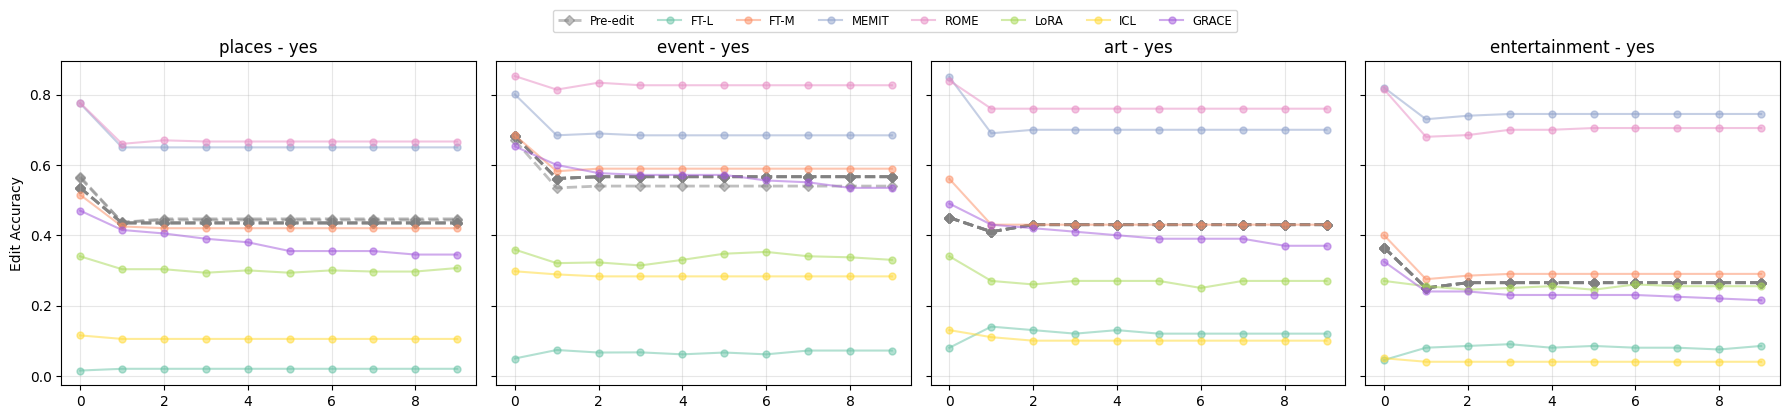

In [9]:
from collections import defaultdict

def plot_multi_turn_all(folder_path):
    edit_methods = set()
    domains = set()
    topics = set()
    types = set()
    data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            domain, topic, edit_method, type_ = parts[0], parts[1], parts[2], parts[3].replace('.json', '')
            edit_methods.add(edit_method)
            domains.add(domain)
            topics.add(topic)
            types.add(type_)

            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            multi_turn_ls_pre = [e['pre']['edit_acc_multi_turn'] for e in metrics]
            multi_turn_ls_post = [e['post']['edit_acc_multi_turn'] for e in metrics]
            
            data[domain][edit_method][type_].append({
                'pre': np.mean(multi_turn_ls_pre, axis=0)[1:],
                'post': np.mean(multi_turn_ls_post, axis=0)[1:]
            })

    types = ['yes']
    fig, axes = plt.subplots(len(types), len(domains), figsize=(18, 1*len(domains)), sharex=True, sharey=True)
    # fig.suptitle('Multi-turn Edit Accuracy for Different Methods', fontsize=16)

    # Create a single legend for all subplots
    lines = []
    labels = []
    
    for i, type_ in enumerate(types):
    # for i, type_ in ['yes']:
        for j, domain in enumerate(domains):
            # print(type_, domain)
            # ax = axes[i, j]
            ax = axes[j]
            ax.grid(True, zorder=-1, alpha=0.3)
            ax.set_title(f'{domain} - {type_}')
            if i == 1:
                ax.set_xlabel('Turn')
            if j == 0:
                ax.set_ylabel('Edit Accuracy')

            for edit_method in edit_method_order_ls:
                if data[domain][edit_method][type_]:
                    avg_pre = np.mean([d['pre'] for d in data[domain][edit_method][type_]], axis=0)  # get the average of multiple topics in the same domain and type
                    avg_post = np.mean([d['post'] for d in data[domain][edit_method][type_]], axis=0)
                    
                    color = colors[edit_method_order_ls.index(edit_method)]
                    pre_line, = ax.plot(avg_pre, marker='D', linestyle='--', alpha=0.5, color='grey', markersize=5, linewidth=2, zorder=-1)
                    # pre_line, = ax.plot(avg_pre, marker='o', linestyle='--', alpha=0.5, markersize=5, color=color)
                    post_line, = ax.plot(avg_post, marker='o', alpha=0.5, markersize=5, color=color)
                    
                    if edit_method not in labels:
                        lines.append(post_line)
                        labels.append(edit_method)

    # Add pre-edit line to legend
    labels.insert(0, 'Pre-edit')
    lines.insert(0, pre_line)

    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize='small')

    plt.tight_layout()
    plt.show()
    # return data

plot_multi_turn_all('../results/mistral_7b_instruct_v0.3_multi_turn')

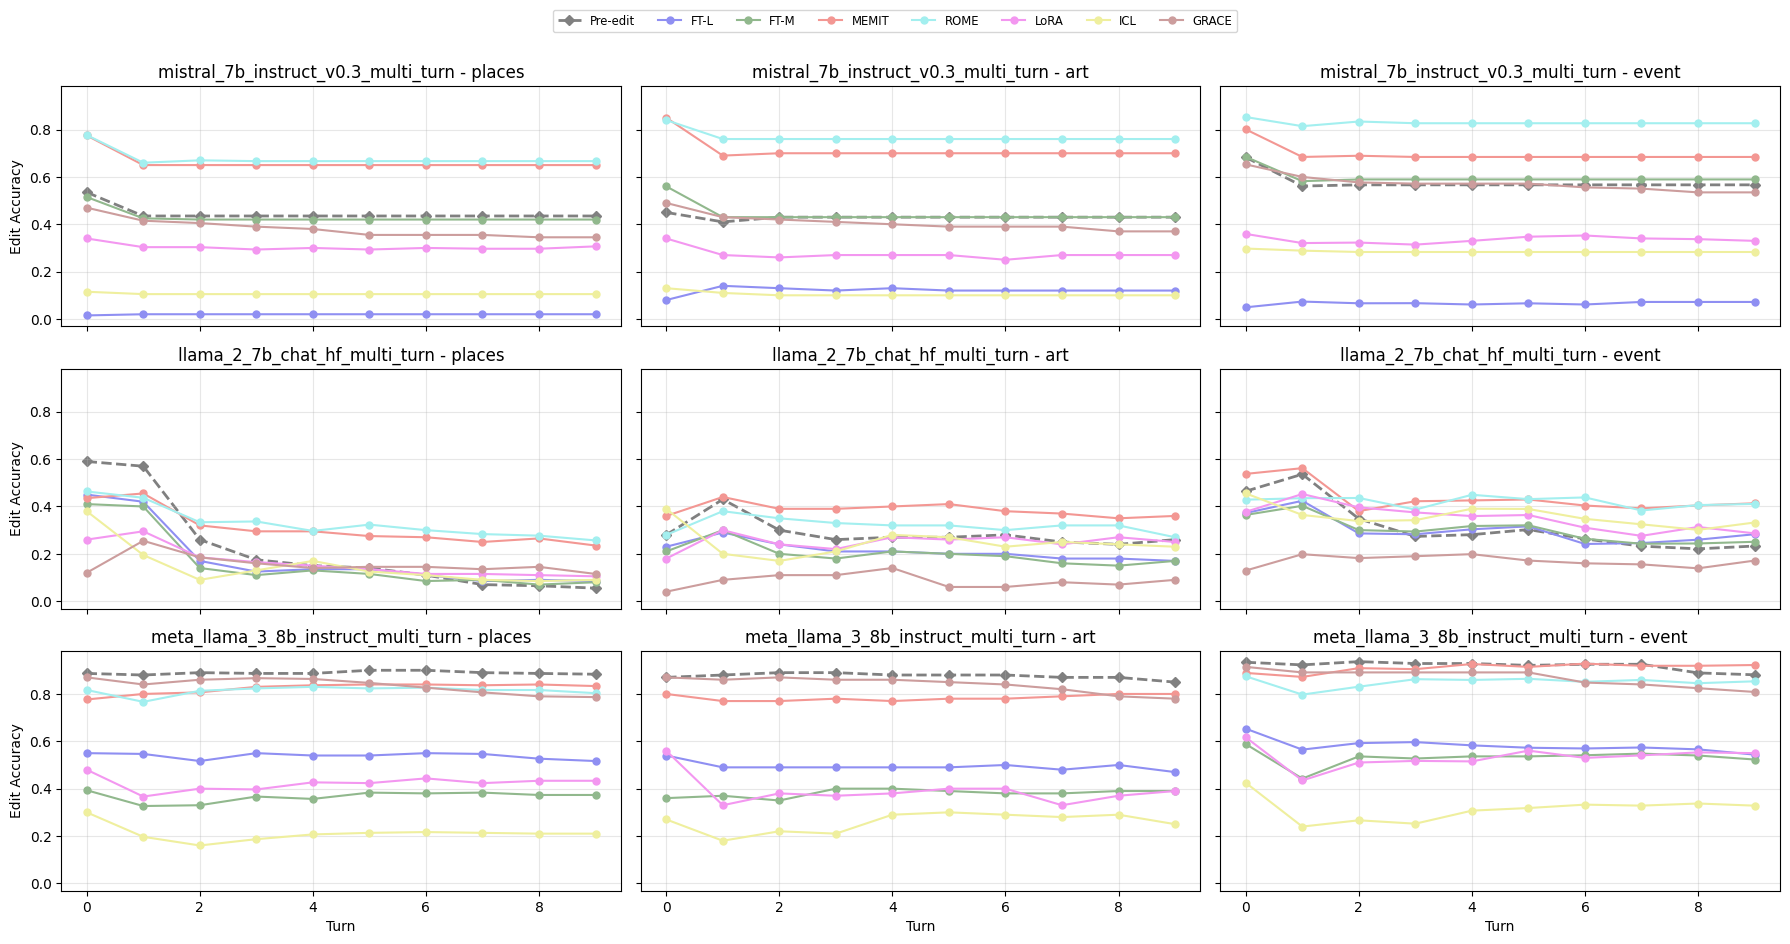

In [7]:
from collections import defaultdict

def plot_multi_turn_all_models(folder_paths):
    edit_methods = set()
    domains = set()
    topics = set()
    types = set()
    data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

    for folder_path in folder_paths:
        for filename in os.listdir(folder_path):
            if filename.endswith('.json'):
                parts = filename.split('_')
                domain, topic, edit_method, type_ = parts[0], parts[1], parts[2], parts[3].replace('.json', '')
                edit_methods.add(edit_method)
                domains.add(domain)
                topics.add(topic)
                types.add(type_)

                file_path = os.path.join(folder_path, filename)
                with open(file_path, 'r') as file:
                    metrics = json.load(file)
                
                multi_turn_ls_pre = [e['pre']['edit_acc_multi_turn'] for e in metrics]
                multi_turn_ls_post = [e['post']['edit_acc_multi_turn'] for e in metrics]
                
                data[os.path.basename(folder_path)][domain][edit_method][type_].append({
                    'pre': np.mean(multi_turn_ls_pre, axis=0)[1:],
                    'post': np.mean(multi_turn_ls_post, axis=0)[1:]
                })

    types = ['yes']
    domains = ['places', 'art', 'event']
    fig, axes = plt.subplots(len(folder_paths), len(domains), figsize=(18, 3*len(folder_paths)), sharex=True, sharey=True)
    
    # Create a single legend for all subplots
    lines = []
    labels = []
    
    for k, folder in enumerate(folder_paths):
        folder_name = os.path.basename(folder)
        for j, domain in enumerate(domains):
            ax = axes[k, j] if len(folder_paths) > 1 else axes[j]
            ax.grid(True, zorder=-1, alpha=0.3)
            ax.set_title(f'{folder_name} - {domain}')
            if k == len(folder_paths) - 1:
                ax.set_xlabel('Turn')
            if j == 0:
                ax.set_ylabel('Edit Accuracy')

            for edit_method in edit_method_order_ls:
                if data[folder_name][domain][edit_method]['yes']:
                    
                    avg_post = np.mean([d['post'] for d in data[folder_name][domain][edit_method]['yes']], axis=0)
                    # print(f'{folder_name} {domain} {edit_method} \npre: {[d['pre'] for d in data[folder_name][domain][edit_method]['yes']]}\n')
                    color = colors[edit_method_order_ls.index(edit_method)]
                    
                    post_line, = ax.plot(avg_post, marker='o', markersize=5, color=color) # , alpha=0.5
                    
                    if edit_method not in labels:
                        lines.append(post_line)
                        labels.append(edit_method)
            avg_pre = np.mean([d['pre'] for d in data[folder_name][domain]['ICL']['yes']], axis=0)
            pre_line, = ax.plot(avg_pre, marker='D', linestyle='--', color='grey', markersize=5, linewidth=2, zorder=-1) # , alpha=0.5

    # Add pre-edit line to legend
    labels.insert(0, 'Pre-edit')
    lines.insert(0, pre_line)

    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize='small')

    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_robustness_3domains.pdf')
    plt.show()

plot_multi_turn_all_models([
    '../results/mistral_7b_instruct_v0.3_multi_turn',
    '../results/llama_2_7b_chat_hf_multi_turn',
    '../results/meta_llama_3_8b_instruct_multi_turn'
])

In [26]:
data['places']['ROME']['yes'], data['art']['ROME']['yes']

([{'pre': array([0.49, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 ]),
   'post': array([0.74, 0.63, 0.64, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63])},
  {'pre': array([0.58, 0.47, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46]),
   'post': array([0.78, 0.57, 0.58, 0.58, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57])}],
 [{'pre': array([0.45, 0.41, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43]),
   'post': array([0.84, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76])}])

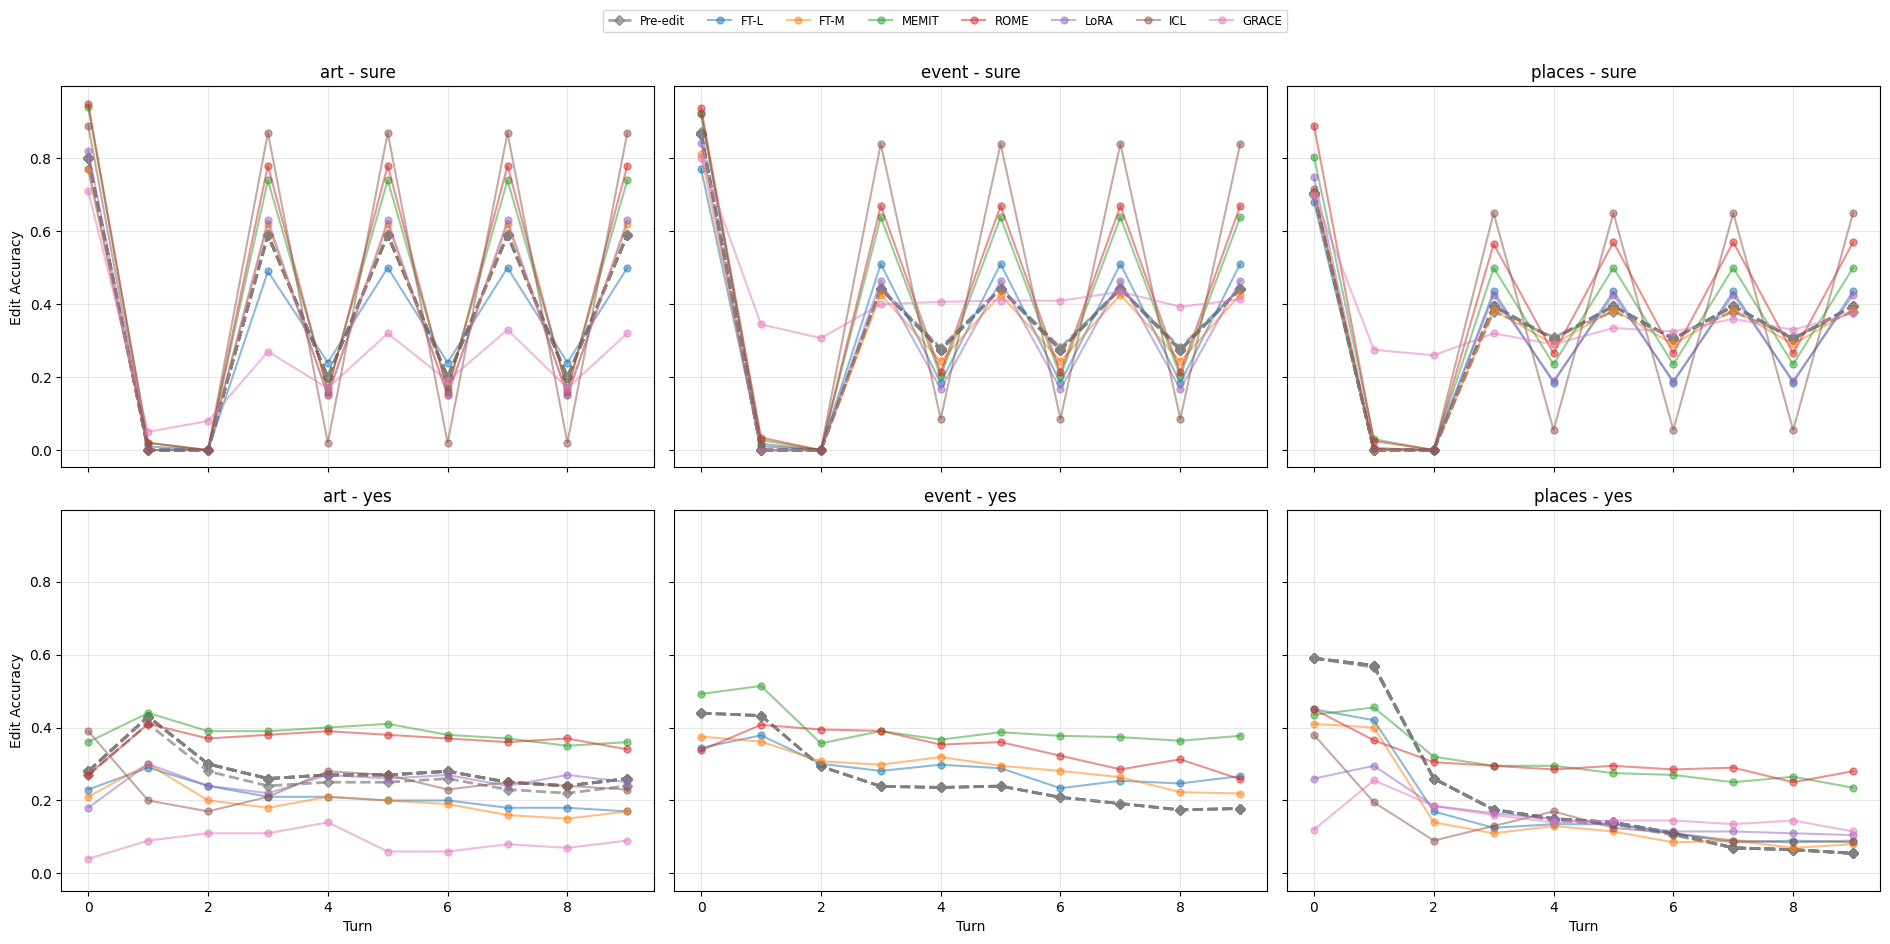

In [38]:
plot_multi_turn_all('../results/llama_2_7b_chat_hf_multi_turn')

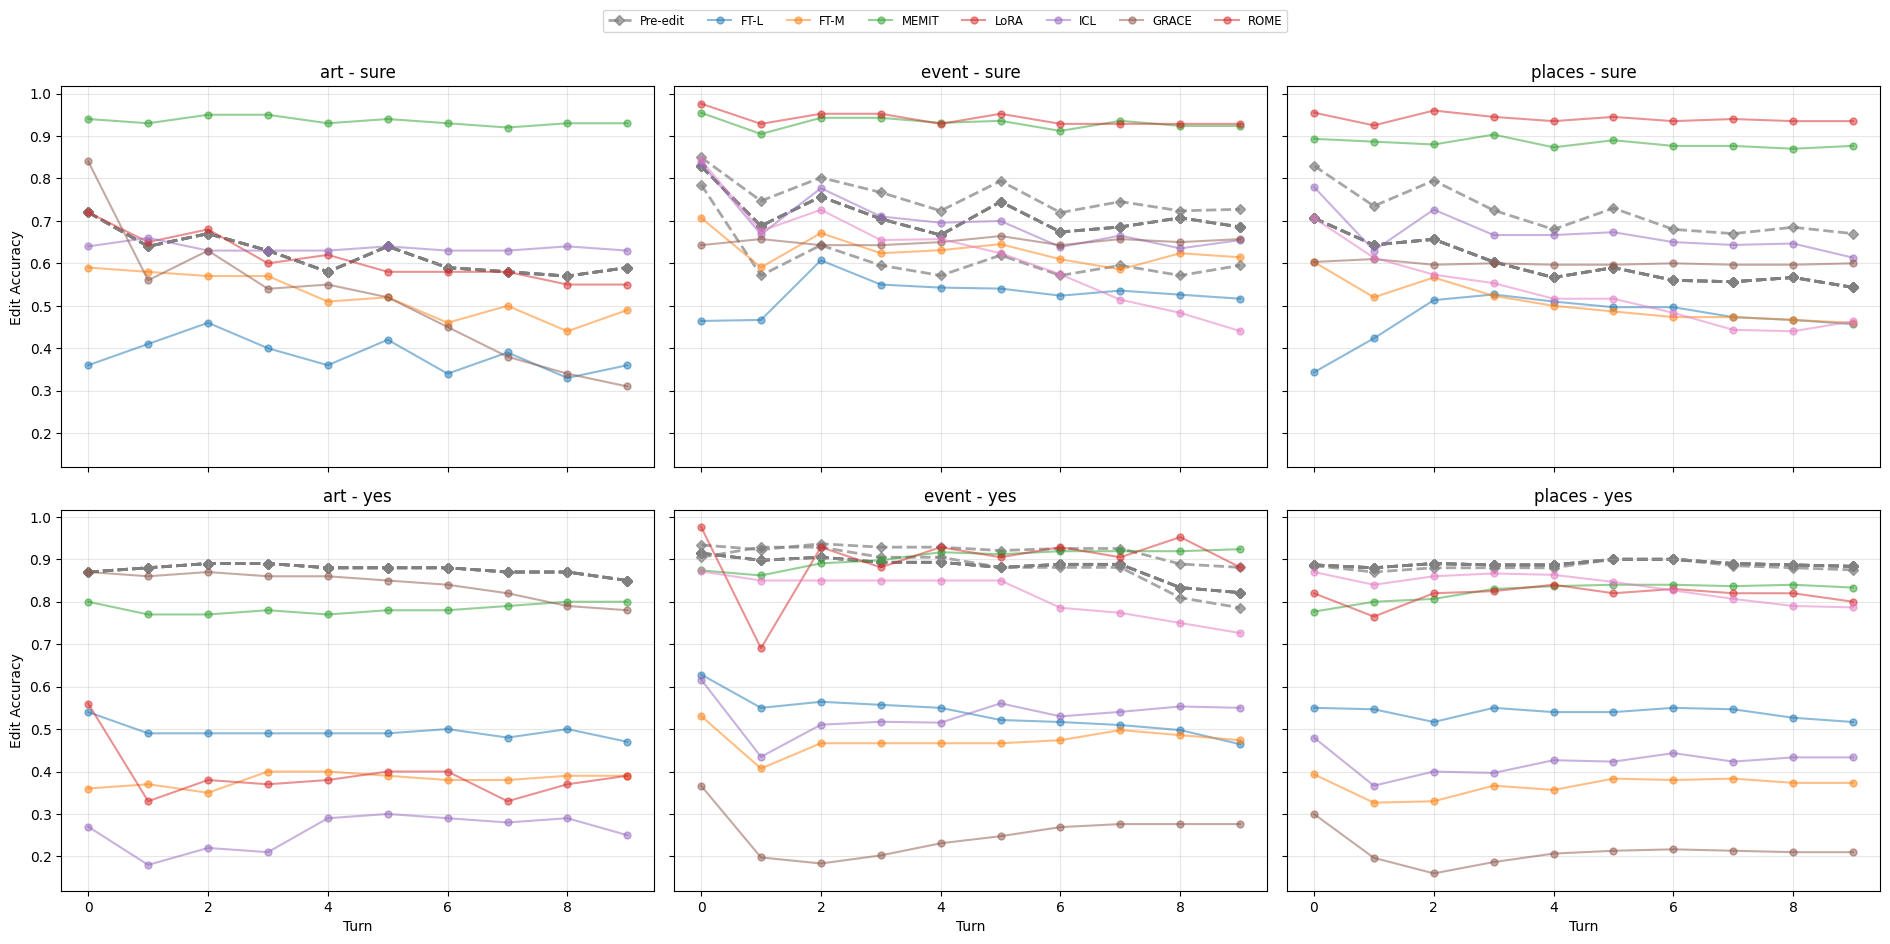

In [39]:
plot_multi_turn_all('../results/meta_llama_3_8b_instruct_multi_turn')

['places_country_FT-L_sure.json', 'places_country_FT-M_sure.json', 'places_country_GRACE_sure.json', 'places_country_ICL_sure.json', 'places_country_LoRA_sure.json', 'places_country_MEMIT_sure.json', 'places_country_ROME_sure.json']
['places_country_FT-L_yes.json', 'places_country_FT-M_yes.json', 'places_country_GRACE_yes.json', 'places_country_ICL_yes.json', 'places_country_LoRA_yes.json', 'places_country_MEMIT_yes.json', 'places_country_ROME_yes.json']
['places_country_FT-L_yesMod.json', 'places_country_FT-M_yesMod.json', 'places_country_GRACE_yesMod.json', 'places_country_ICL_yesMod.json', 'places_country_LoRA_yesMod.json', 'places_country_MEMIT_yesMod.json', 'places_country_ROME_yesMod.json']
['places_country_GRACE_yesModGRACE.json']


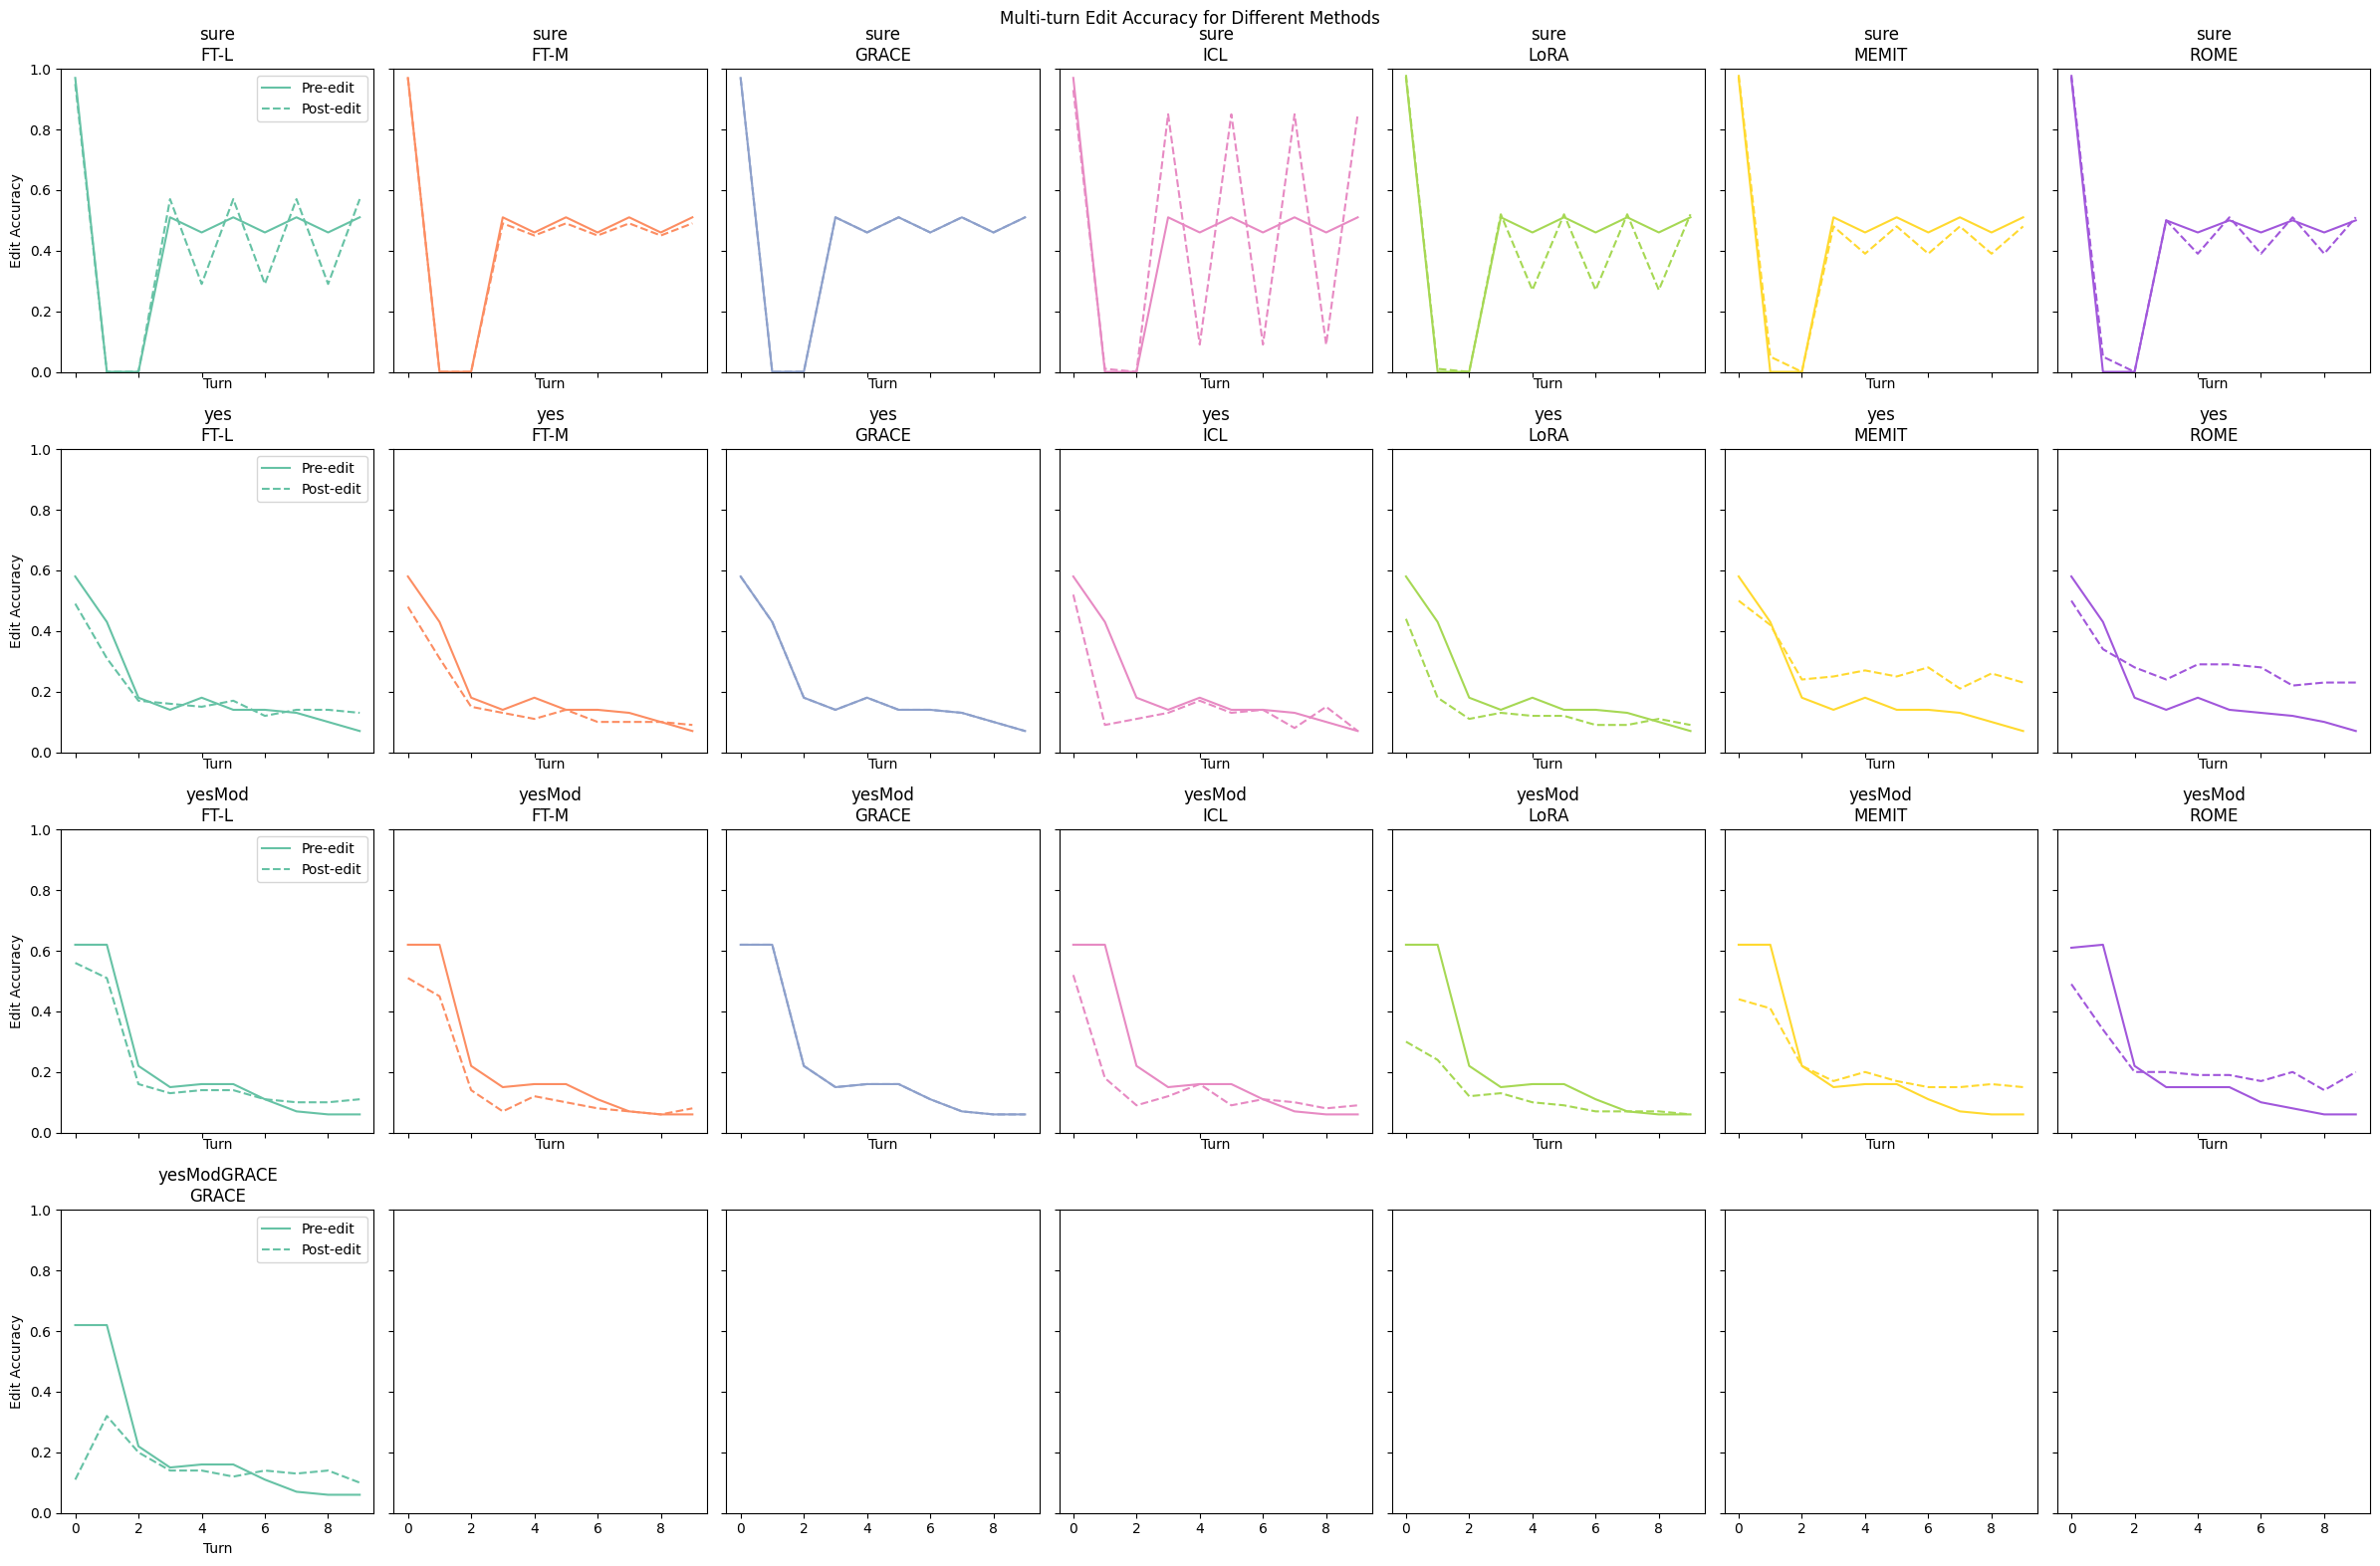

In [13]:
plot_multi_turn_all('../results/llama_2_7b_chat_hf_multi_turn')

In [ ]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

{'pre': {'edit_acc': 0,
  'edit_output': 'Bechuanaland',
  'edit_acc_multi_turn': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'edit_output_multi_turn': ['Bechuanaland',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes'],
  'locality': {'locality_output': ['Gaborone']},
  'portability': {},
  'yes_questions': {'yes_acc': [1], 'yes_output': ['Yes']},
  'no_questions': {'no_acc': [0], 'no_output': ['Yes']},
  'multiple_choice_questions': {'multiple_choice_acc': [0],
   'multiple_choice_output': ['Bechuanaland']},
  'reversed_relation_questions': {'reversed_relation_acc': [0],
   'reversed_relation_output': ['Ireland']},
  'questions_2hop': {'2hop_acc': [1], '2hop_output': ['South Africa']},
  'questions_3hop': {'3hop_acc': [0], '3hop_output': ['South Africa']},
  'questions_4hop': {'4hop_acc': [0], '4hop_output': ['English']},
  'questions_5hop': {'5hop_acc': [0], '5hop_output': ['South Africa']},
  'questions_6hop': {'6hop_acc': [1], '6hop_output

## Table Summary

In [18]:
def summarize_results_tmp(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                parts = filename.split('_')
                domain = parts[0]
                topic = ' '.join(parts[1:-1])  
                edit_method = parts[-1].replace('.json', '')  

                results = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    return df, df_multi_hop
df, df_multi_hop = summarize_results_tmp("../tmp/all_grace/llama_2_7b_chat_hf")
df[df['edit_method']=='GRACE']

domain                 topic edit_method  efficacy_pre  \
0             art             sculpture       GRACE           0.0   
1        business                 brand       GRACE           0.0   
2        business              industry       GRACE           0.0   
3   entertainment                 anime       GRACE           0.0   
4   entertainment           music genre       GRACE           0.0   
5   entertainment                  song       GRACE           0.0   
6           event                  film       GRACE           0.0   
7           event               history       GRACE           0.0   
8           event                 sport       GRACE           0.0   
9       geography                forest       GRACE           0.0   
10      geography               glacier       GRACE           0.0   
11      geography               volcano       GRACE           0.0   
12         health               disease       GRACE           0.0   
13         health            medication       GRACE           0.0   
14         health               symptom       GRACE           0.0   
15          human               athlete       GRACE           0.0   
16          human          entrepreneur       GRACE           0.0   
17          human             scientist       GRACE           0.0   
18          human                writer       GRACE           0.0   
19         places                  city       GRACE           0.0   
20         places               country       GRACE           0.0   
21         places              landmark       GRACE           0.0   
22     technology              database       GRACE           0.0   
23     technology  programming language       GRACE           0.0   
24     technology              software       GRACE           0.0   

    efficacy_post  rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  \
0           98.00          7.00            0.0    43.00       0.0   34.00   
1           93.00         11.00            0.0    43.00       0.0   35.00   
2           96.00         23.00            0.0    79.00       0.0   19.00   
3           92.00         11.00            0.0    35.00       1.0   40.00   
4           90.00         17.00            0.0    48.00       0.0   42.00   
5           93.00         11.00            0.0    48.00       0.0   47.00   
6           95.83         10.42            0.0    43.75       0.0   37.50   
7           93.24         13.51            0.0    43.24       0.0   44.59   
8           94.29         17.14            0.0    45.71       0.0   40.00   
9           86.00         30.00            0.0    80.00       0.0   46.00   
10          98.70         36.36            0.0    62.34       0.0   75.32   
11         100.00         17.00            0.0    27.00       0.0   71.00   
12          93.00         13.00            0.0    47.00       0.0   40.00   
13         100.00          4.00            0.0    80.00       0.0   28.00   
14          90.00         30.00            0.0    33.33       0.0   46.67   
15          94.00         20.00            0.0    28.00       0.0   56.00   
16          98.00          9.00            0.0    34.00       0.0   48.00   
17          95.00         12.00            0.0    38.00       0.0   40.00   
18         100.00         15.00            0.0    30.00       0.0   53.00   
19          97.00         25.00            0.0    22.00       0.0   68.00   
20          97.00         14.00            0.0    53.00       0.0   33.00   
21          97.00         10.00            0.0    39.00       0.0   50.00   
22          89.53          3.49            0.0    40.70       0.0   45.35   
23          99.00         11.00            0.0    38.00       0.0   47.00   
24          98.00         14.00            0.0    41.00       0.0   37.00   

    no_post  mc_pre  mc_post  reversed_pre  reversed_post  locality_post  
0       0.0   61.00     1.00          7.00            0.0          24.00  
1       0.0   61.00     1.00          8.00            0.0      

In [48]:
df_llama2[df_llama2['edit_method']=='GRACE']

edit_method         domain                 topic  efficacy_pre  \
156       GRACE            art             sculpture           0.0   
157       GRACE       business                 brand           0.0   
158       GRACE       business           corporation           0.0   
159       GRACE       business              industry           0.0   
160       GRACE  entertainment                 anime           0.0   
161       GRACE  entertainment           music genre           0.0   
162       GRACE  entertainment                  song           0.0   
163       GRACE          event                  film           0.0   
164       GRACE          event               history           0.0   
165       GRACE          event                 sport           0.0   
166       GRACE      geography                forest           0.0   
167       GRACE      geography               glacier           0.0   
168       GRACE      geography               volcano           0.0   
169       GRACE         health               disease           0.0   
170       GRACE         health            medication           0.0   
171       GRACE         health               symptom           0.0   
172       GRACE          human               athlete           0.0   
173       GRACE          human          entrepreneur           0.0   
174       GRACE          human             scientist           0.0   
175       GRACE          human                writer           0.0   
176       GRACE         places                  city           0.0   
177       GRACE         places               country           0.0   
178       GRACE         places              landmark           0.0   
179       GRACE     technology              database           0.0   
180       GRACE     technology  programming language           0.0   
181       GRACE     technology              software           0.0   

     efficacy_post  rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  \
156          98.00          7.00            0.0    43.00       0.0   34.00   
157          93.00         11.00            0.0    43.00       0.0   35.00   
158          91.00          7.00            0.0    36.00       0.0   41.00   
159          96.00         23.00            0.0    79.00       0.0   19.00   
160          92.00         11.00            0.0    35.00       1.0   40.00   
161          90.00         17.00            0.0    48.00       0.0   42.00   
162          93.00         11.00            0.0    48.00       0.0   47.00   
163          95.83         10.42            0.0    43.75       0.0   37.50   
164          93.24         13.51            0.0    43.24       0.0   44.59   
165          94.29         17.14            0.0    45.71       0.0   40.00   
166          86.00         30.00            0.0    80.00       0.0   46.00   
167          98.70         36.36            0.0    62.34       0.0   75.32   
168         100.00         17.00            0.0    27.00       0.0   71.00   
169          93.00         13.00            0.0    47.00       0.0   40.00   
170         100.00          4.00            0.0    80.00       0.0   28.00   
171          90.00         30.00            0.0    33.33       0.0   46.67   
172          94.00         20.00            0.0    28.00       0.0   56.00   
173          98.00          9.00            0.0    34.00       0.0   48.00   
174          95.00         12.00            0.0    38.00       0.0   40.00   
175         100.00         15.00            0.0    30.00       0.0   53.00   
176          97.00         25.00            0.0    22.00       0.0   68.00   
177          97.00         14.00            0.0    53.00       0.0   33.00   
178          97.00         10.00            0.0    39.00       0.0   50.00   
179          89.53          3.49            0.0    40.70       0.0   45.35   
180          99.00         11.00            0.0    38.00       0.0   47.00   
181          98.00         14.00            0.0    41.00       0.0   37.00   

     n

In [49]:
df_llama2.groupby('edit_method').mean()

efficacy_pre  efficacy_post  rephrase_pre  rephrase_post  \
edit_method                                                             
FT-L                  0.0      66.975385     15.073846      63.789615   
FT-M                  0.0      61.216538     15.073846      57.430000   
GRACE                 0.0      94.945769     15.073846       0.000000   
ICL                   0.0      99.154615     15.073846      97.166154   
LoRA                  0.0      76.605000     15.073846      69.554615   
MEMIT                 0.0      76.001923     15.073846      71.517692   
ROME                  0.0      74.377692     15.073846      67.805385   

               yes_pre   yes_post     no_pre    no_post     mc_pre    mc_post  \
edit_method                                                                     
FT-L         44.541154  40.970385  44.785769  43.449231  60.892692  57.674615   
FT-M         44.541154  42.608462  44.785769  43.746154  60.892692  61.236923   
GRACE        44.541154   0.038462  44.785769   0.000000  60.892692   2.526538   
ICL          44.541154  83.700769  44.785769  70.808846  60.892692  83.716538   
LoRA         44.541154  50.940769  44.785769  44.213077  60.892692  62.936154   
MEMIT        44.541154  61.060769  44.785769  42.685769  60.892692  64.575000   
ROME         44.541154  66.560000  44.939615  45.388462  60.815769  65.339615   

             reversed_pre  reversed_post  locality_post  
edit_method                                              
FT-L            10.403462       7.602692      49.218846  
FT-M            10.403462       9.366154      73.061923  
GRACE           10.403462       0.038462      27.945769  
ICL             10.403462      53.898462      51.218077  
LoRA            10.403462       9.777692      57.855769  
MEMIT           10.403462      10.070000      35.420769  
ROME            10.403462       9.529615      40.088077

## Portability Multi-hop

plot the df_domain to line charts with 3 by 3 subplot, each for one domain, each subplot shows 2 (pre- and post- score) * 7 edit_method = 14 lines.
since all the pre- scores with dashed lines are overlapping, using only 1 color for the pre- socre for 7 methods. Also only show 1 legend in the center top part because they are all the same for 9 subplots

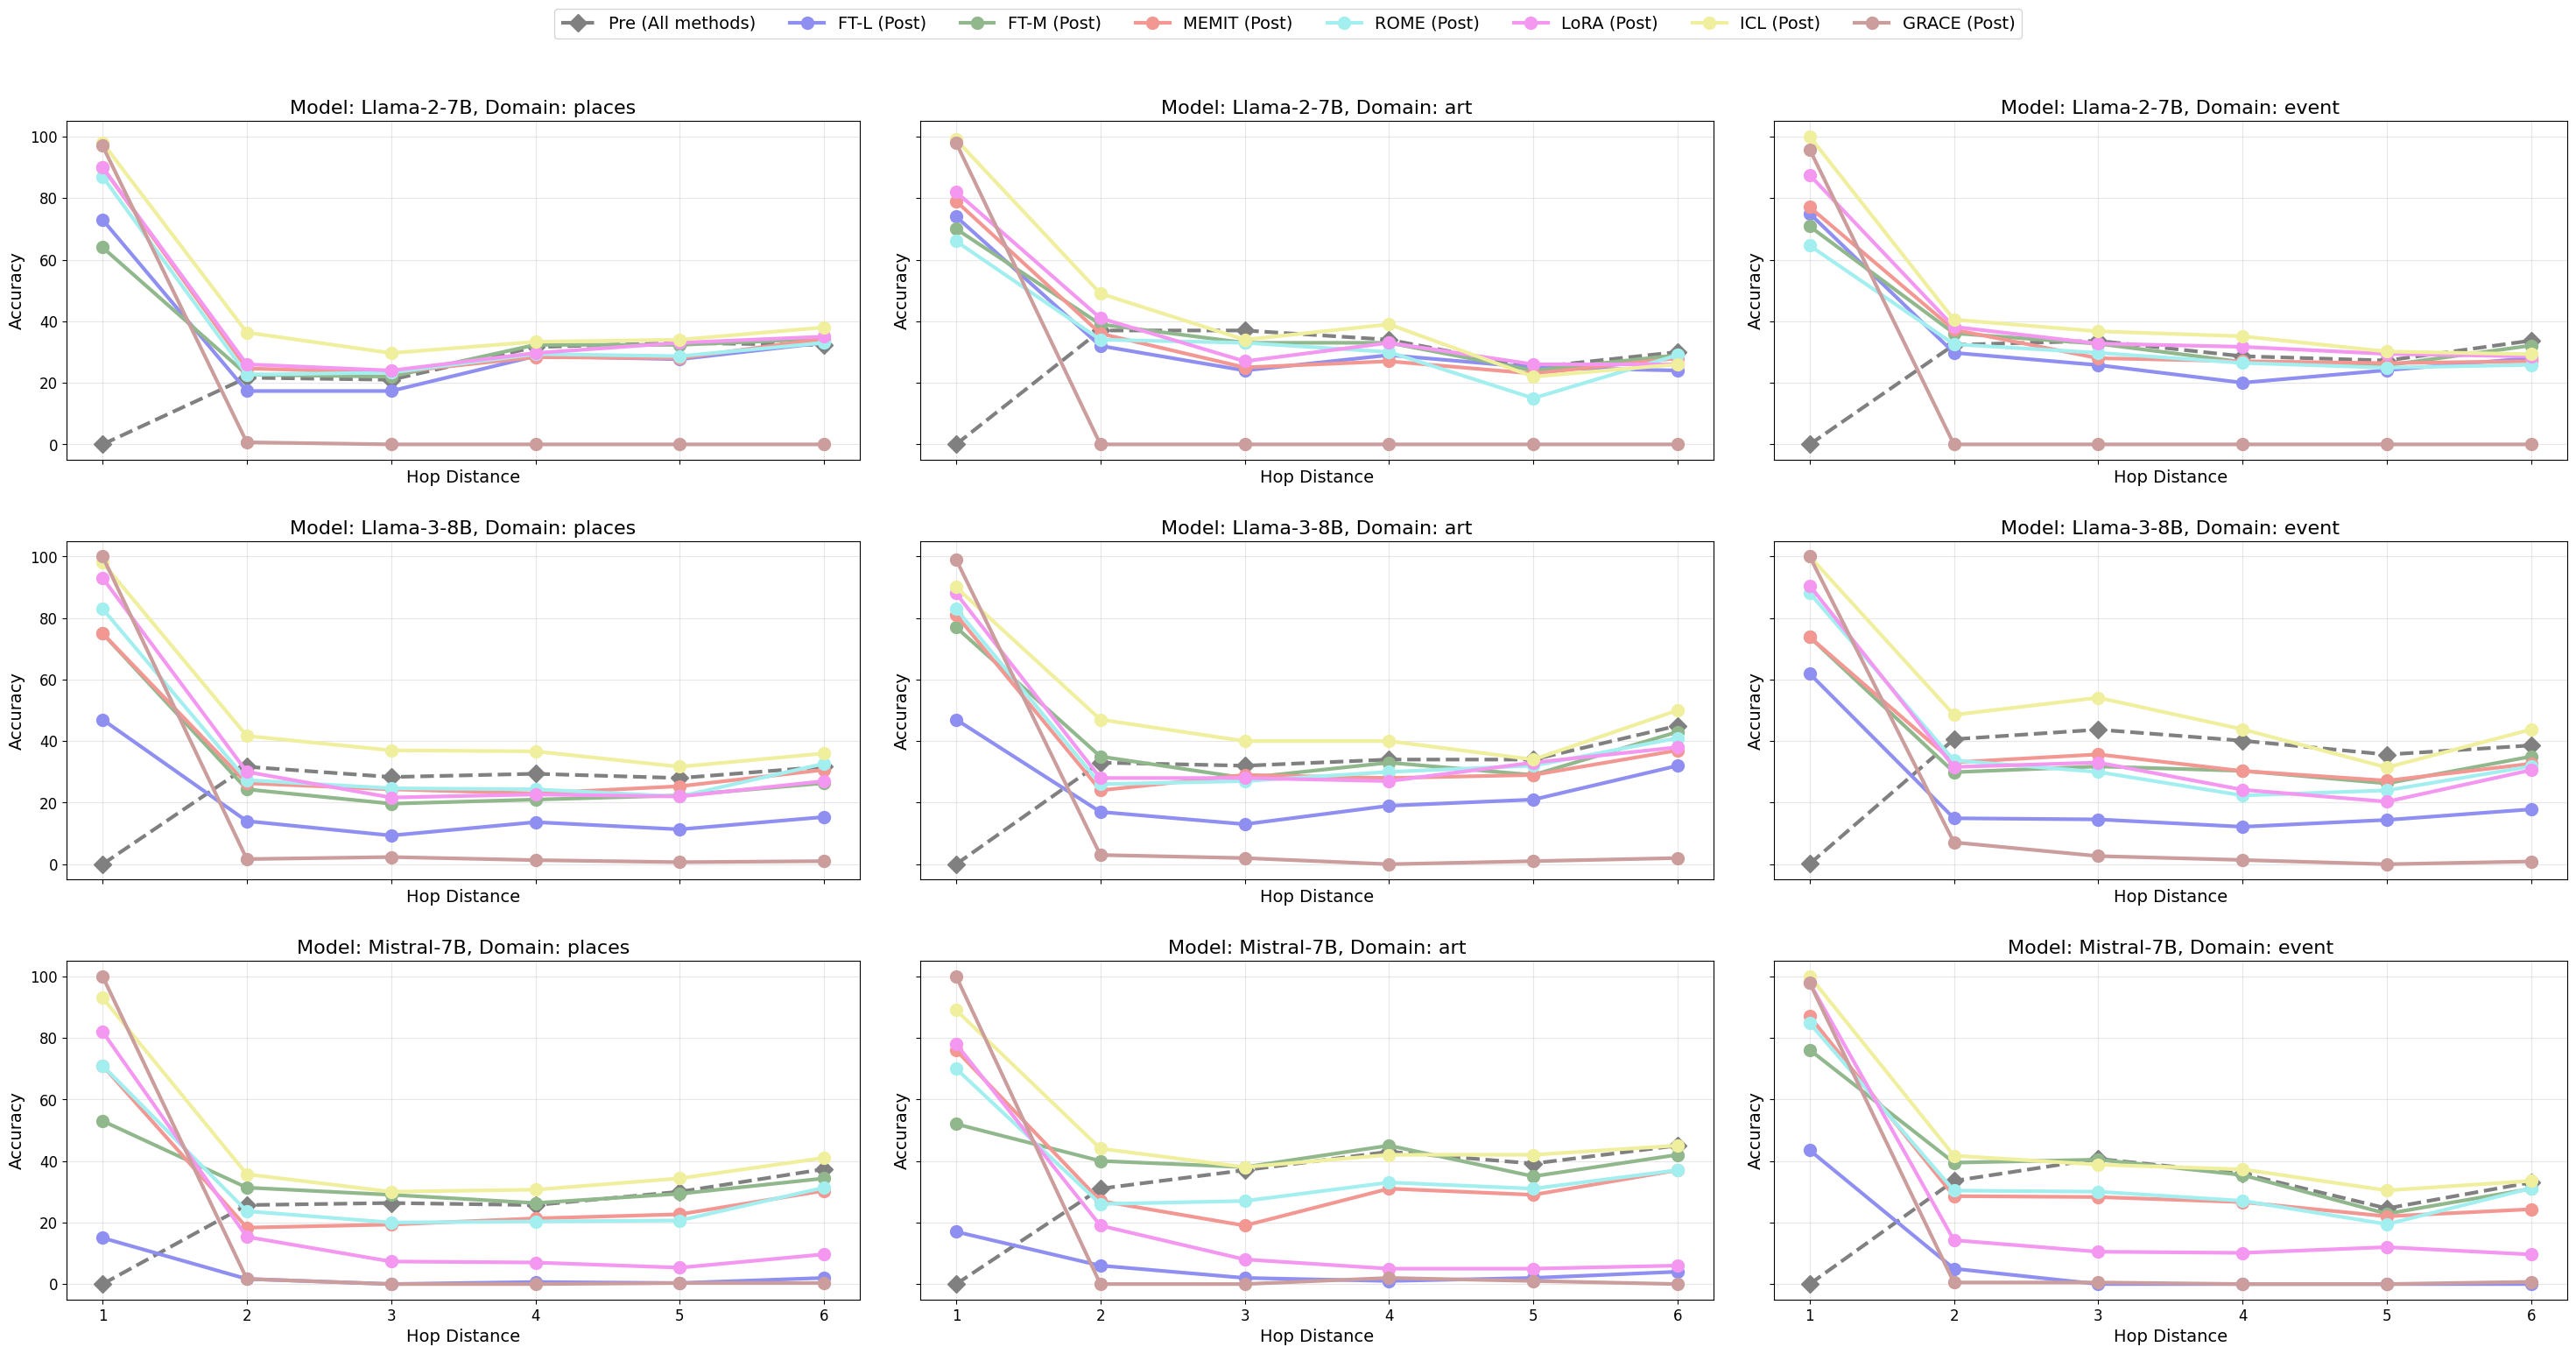

In [17]:
def plot_multi_hop(df_list, df_multi_hop_list, names):
    fig, axes = plt.subplots(3, 3, figsize=(30, 15), sharex=True, sharey=True)
    
    domains_to_plot = ['places', 'art', 'event']
    edit_methods = df_list[0]['edit_method'].unique()
    
    lines = []
    labels = []
    
    for i, (df, df_multi_hop, name) in enumerate(zip(df_list, df_multi_hop_list, names)):
        for j, domain in enumerate(domains_to_plot):
            ax = axes[i, j]
            
            df_domain = df_multi_hop[df_multi_hop['domain'] == domain].groupby('edit_method').mean().reset_index()
            df_domain = df_domain.merge(df[df['domain'] == domain][['edit_method', 'efficacy_pre', 'efficacy_post']], 
                                        on='edit_method', how='left')
            
            ax.grid(True, zorder=-1, alpha=0.3)
            
            pre_values = [df_domain['efficacy_pre'].mean()] + [df_domain[f'questions_{k}hop_pre'].mean() for k in range(2, 7)]
            pre_line, = ax.plot(range(1, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre (All methods)', linewidth=3, alpha=1, zorder=2, markersize=10)
            
            if i == 0 and j == 0:
                lines.append(pre_line)
                labels.append('Pre (All methods)')
            
            for k, method in enumerate(edit_methods):
                method_data = df_domain[df_domain['edit_method'] == method]
                post_values = [method_data['efficacy_post'].values[0]] + [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
                post_line, = ax.plot(range(1, 7), post_values, marker='o', color=colors[k], label=f"{method} (Post)", zorder=2, alpha=1, linewidth=3, markersize=10)
                
                if i == 0 and j == 0:
                    lines.append(post_line)
                    labels.append(f"{method} (Post)")
            
            ax.set_xlabel('Hop Distance', fontsize=14)
            ax.set_ylabel('Accuracy', fontsize=14)
            ax.set_title(f'Model: {name}, Domain: {domain}', fontsize=16)
            ax.set_xticks(range(1, 7))
            ax.set_xticklabels(['1', '2', '3', '4', '5', '6'], fontsize=12)
            ax.tick_params(axis='y', labelsize=12)
            ax.set_axisbelow(True)
    
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize=14)
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_multi_hop_comparison.pdf', bbox_inches='tight', dpi=300)
    plt.show()

# Assuming you have data for three models
plot_multi_hop([df_llama2, df_llama3, df_mistral], 
               [df_multi_hop_llama2, df_multi_hop_llama3, df_multi_hop_mistral], 
               ['Llama-2-7B', 'Llama-3-8B', 'Mistral-7B'])

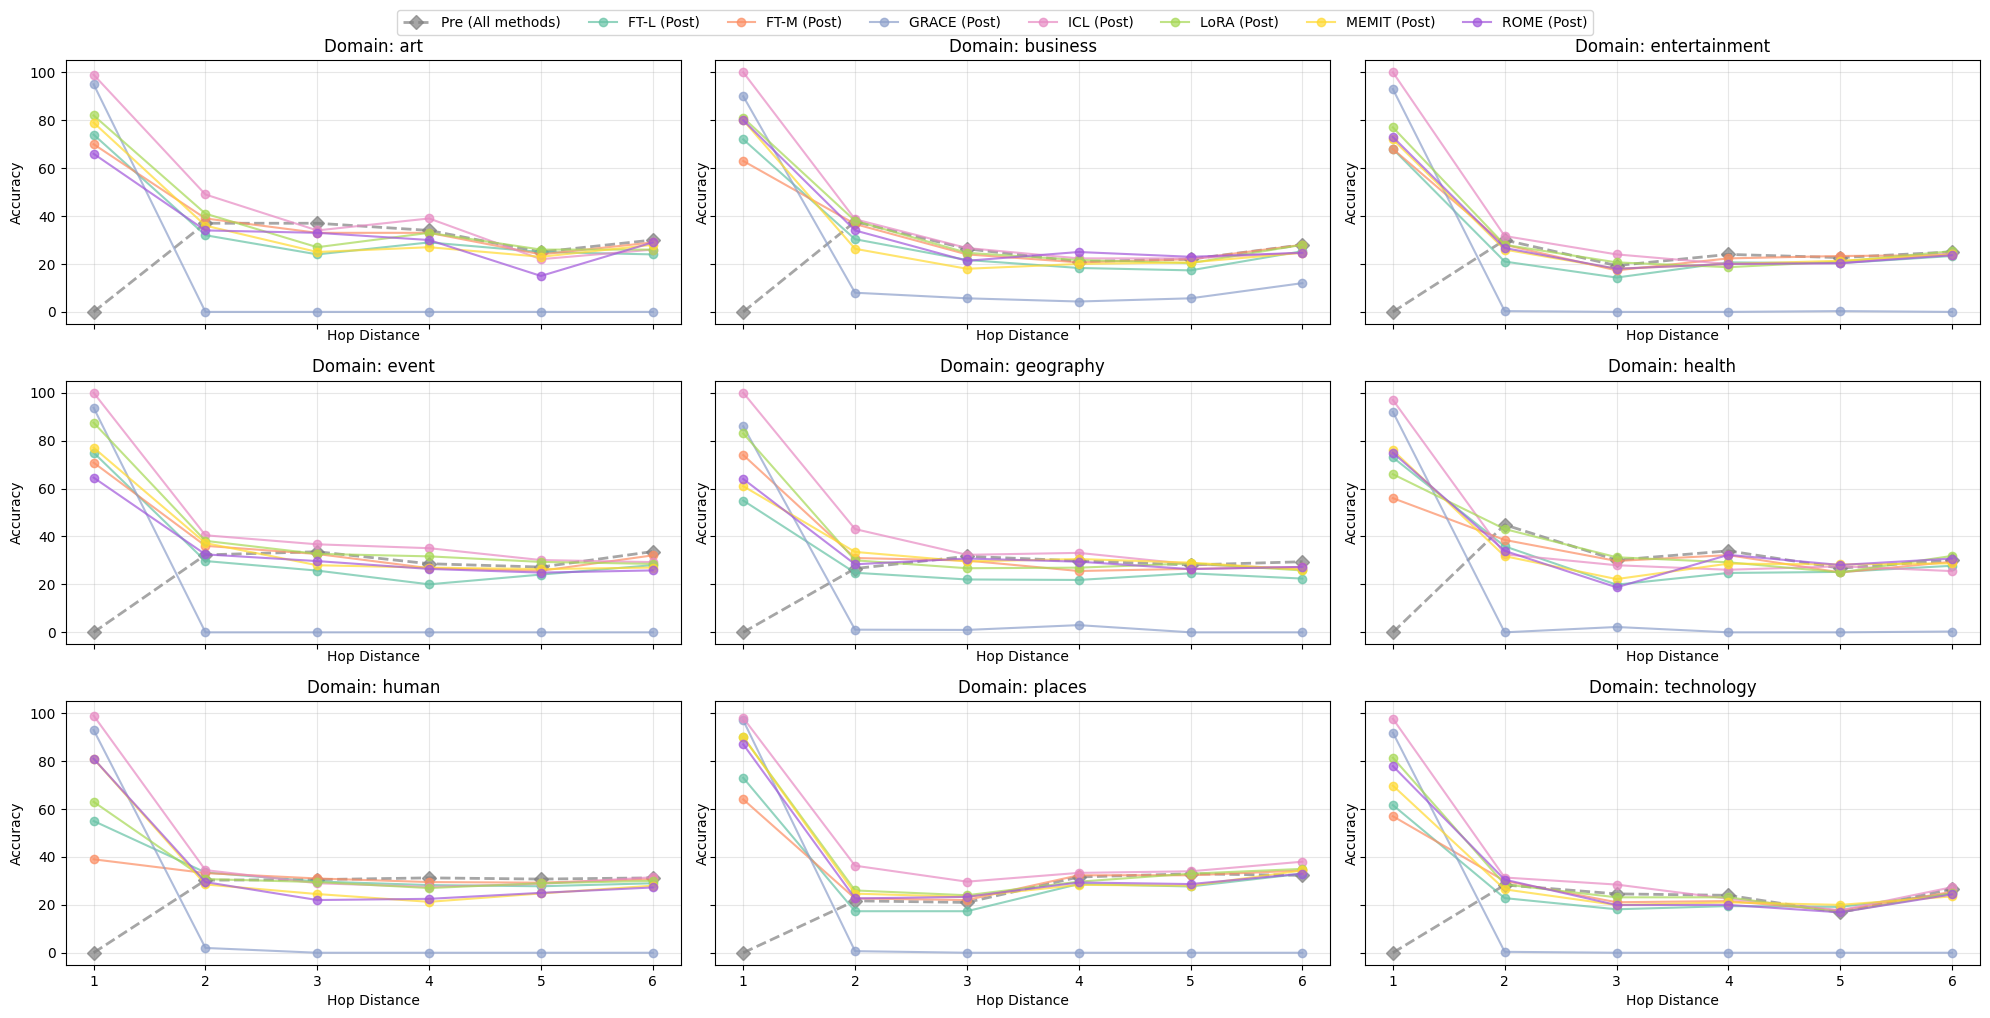

In [104]:
def plot_multi_hop(df, df_multi_hop, name):
    df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

    # Merge df with df_domain to include efficacy columns
    df_domain = df_domain.merge(df[['domain', 'edit_method', 'efficacy_pre', 'efficacy_post']], 
                                on=['domain', 'edit_method'], how='left')

    # Set up the subplot grid
    fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)

    # Get unique domains and edit methods
    domains = df_domain['domain'].unique()
    edit_methods = df_domain['edit_method'].unique()

    # Color palette for edit methods (post-editing)
    # colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'brown']

    # Create a single legend for the entire figure
    lines = []
    labels = []

    for i, domain in enumerate(domains):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        domain_data = df_domain[df_domain['domain'] == domain]
        
        ax.grid(True, zorder=-1, alpha=0.3)
        
        # Plot pre-editing scores (all methods in one color)
        pre_values = [domain_data['efficacy_pre'].mean()] + [domain_data[f'questions_{k}hop_pre'].mean() for k in range(2, 7)]
        pre_line, = ax.plot(range(1, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre (All methods)', linewidth=2, alpha=0.7, zorder=2, markersize=7)
        
        if i == 0:
            lines.append(pre_line)
            labels.append('Pre (All methods)')
        
        for j, method in enumerate(edit_methods):
            method_data = domain_data[domain_data['edit_method'] == method]
            post_values = [method_data['efficacy_post'].values[0]] + [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
            post_line, = ax.plot(range(1, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)", zorder=2, alpha=0.7)
            
            if i == 0:
                lines.append(post_line)
                labels.append(f"{method} (Post)")
        
        ax.set_xlabel('Hop Distance')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Domain: {domain}')
        ax.set_xticks(range(1, 7))
        ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
        
        ax.set_axisbelow(True)

    # Remove any unused subplots
    for i in range(len(domains), 9):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    # Add a single legend to the center top of the figure
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=8)

    plt.tight_layout()
    
    plt.savefig(f'../results/figs/plot_multi_hop_{name}.pdf', bbox_inches='tight')
    
    plt.show()

plot_multi_hop(df_llama2, df_multi_hop_llama2, 'llama_2_7b')

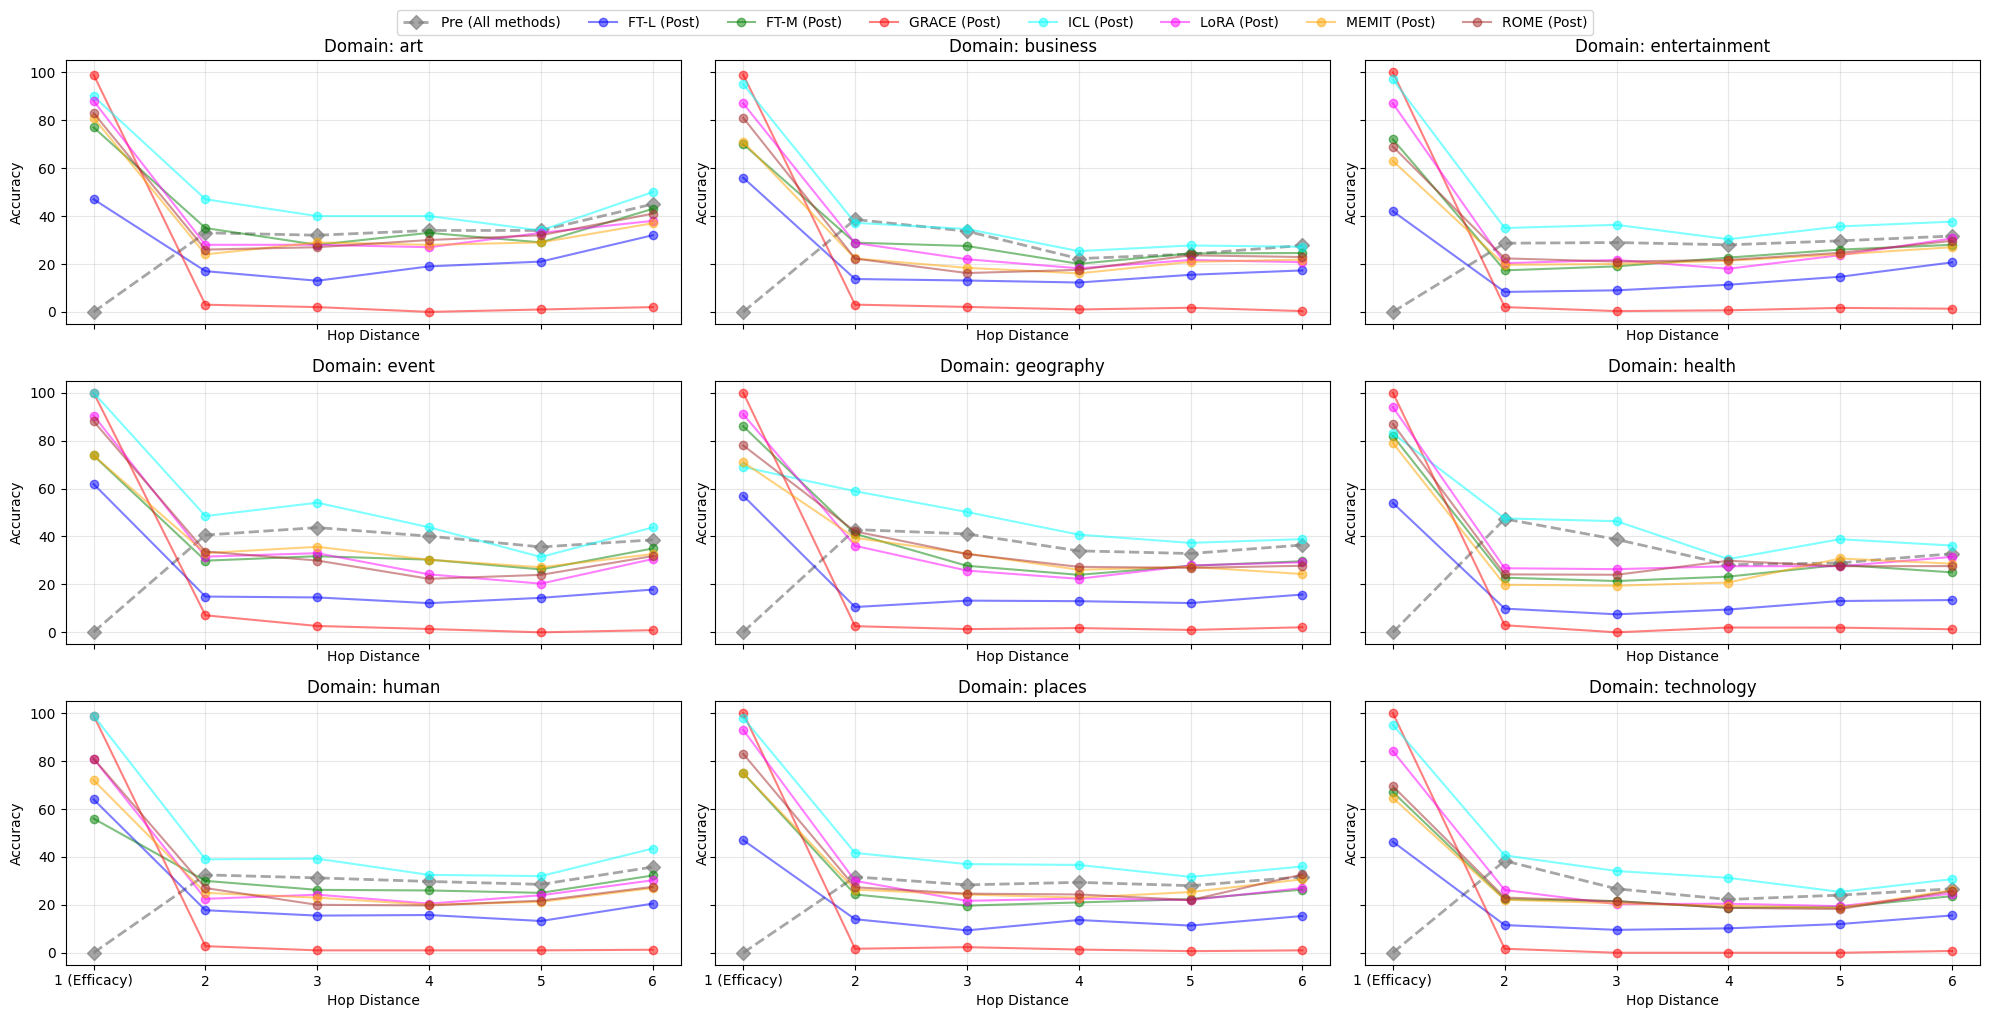

In [ ]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plot_multi_hop(df, df_multi_hop, 'llama_3_8b')

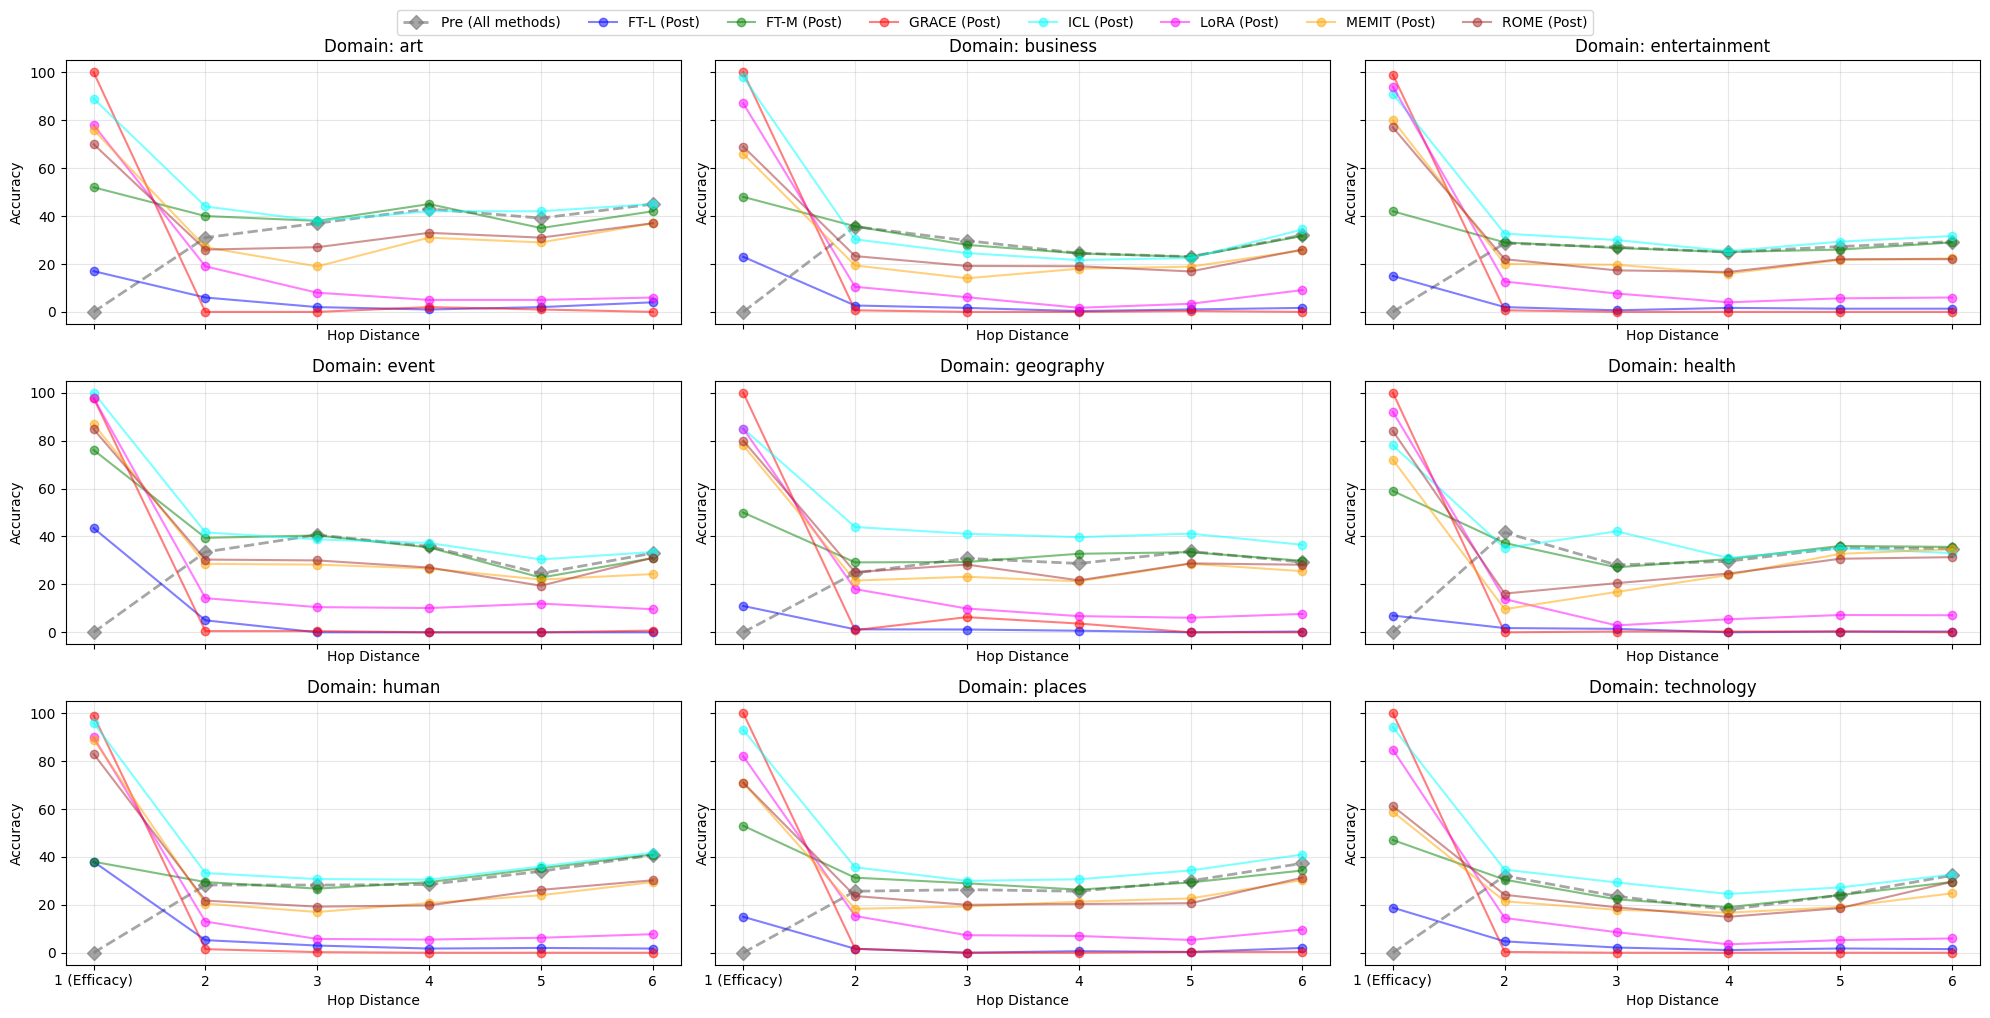

In [33]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
plot_multi_hop(df, df_multi_hop, 'mistral_7b')

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

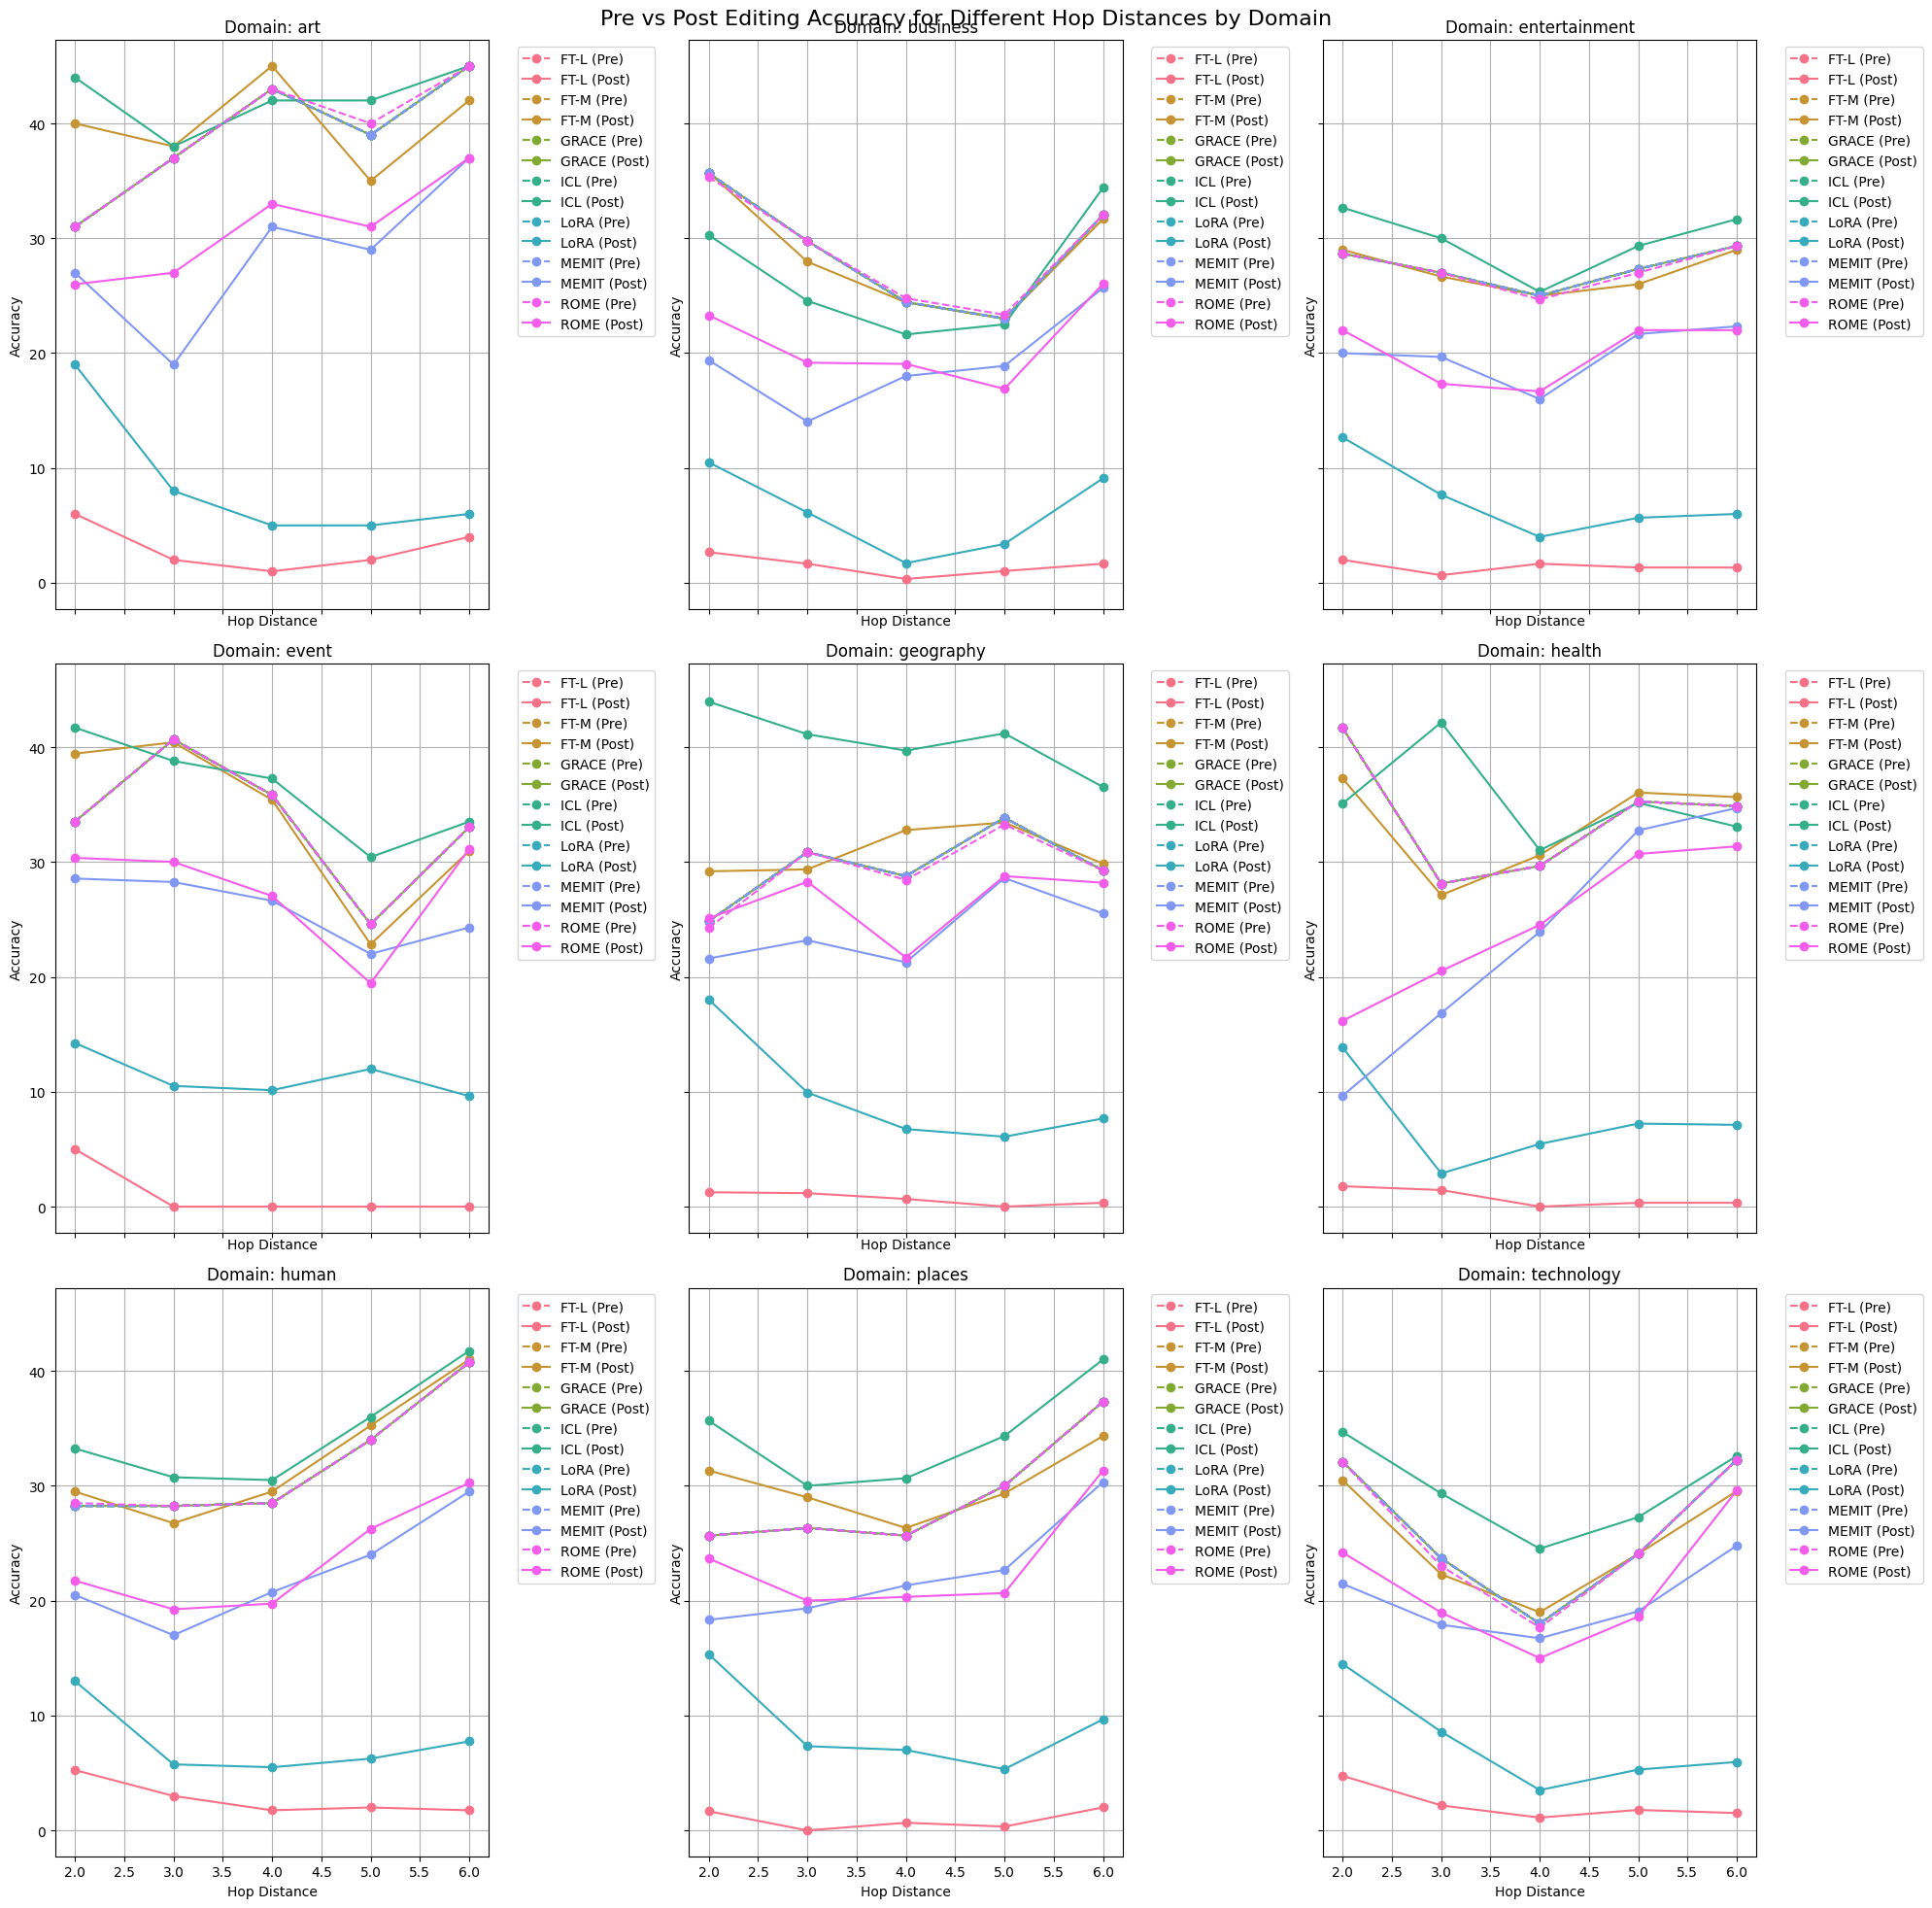

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group by domain and calculate mean for each hop
df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

# Get unique domains and edit methods
domains = df_domain['domain'].unique()
edit_methods = df_domain['edit_method'].unique()

# Set up the subplot grid
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Pre vs Post Editing Accuracy for Different Hop Distances by Domain', fontsize=16)

# Color palette for edit methods
colors = sns.color_palette("husl", n_colors=len(edit_methods))

for i, domain in enumerate(domains):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    domain_data = df_domain[df_domain['domain'] == domain]
    
    for j, method in enumerate(edit_methods):
        method_data = domain_data[domain_data['edit_method'] == method]
        
        pre_values = [method_data[f'questions_{k}hop_pre'].values[0] for k in range(2, 7)]
        post_values = [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
        
        ax.plot(range(2, 7), pre_values, marker='o', linestyle='--', color=colors[j], label=f"{method} (Pre)")
        ax.plot(range(2, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)")
    
    ax.set_xlabel('Hop Distance')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Domain: {domain}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

# Remove any unused subplots
for i in range(len(domains), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

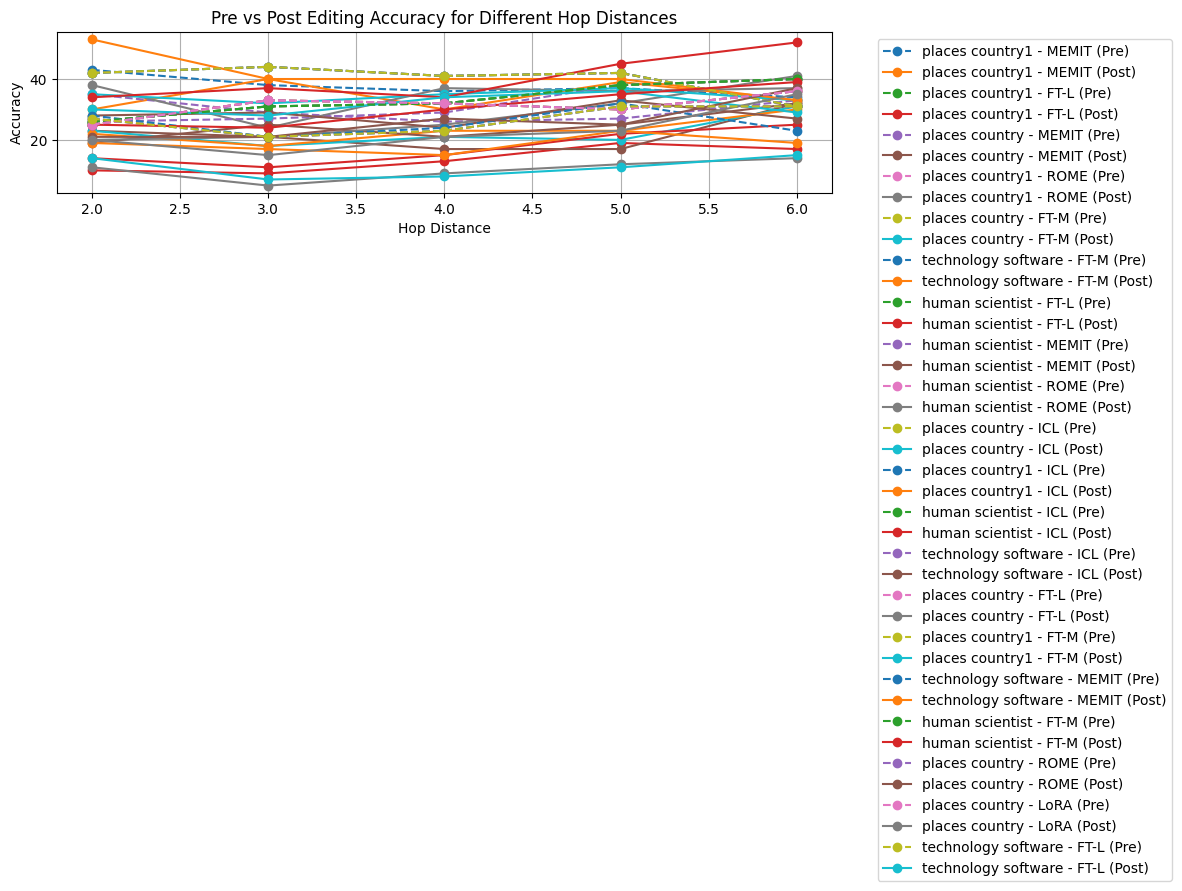

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3.1_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

## Data Statistics

In [119]:
from util import model_id_format_ls
model_id_format_ls

['meta_llama_3_8b_instruct',
 'mistral_7b_instruct_v0.3',
 'llama_2_7b_chat_hf',
 'gemma_1.1_2b_it',
 'gemma_2_9b_it']

In [ ]:
for model_id in model_id_format_ls[:3]:
    folder_unfiltered = f'../data/questions/unfiltered/{model_id}'
    folder_final = f'../data/questions/hallucination_final/{model_id}'

each file in the folder_unfiltered and folder_hallu_all has name format: {domain}_{topic}.csv, get the size of each file with len(df), summarize the size for each file in dataframe with 3 columns: domain_topic, unfiltered_size, hallucination_all_size, and the percentage of the hallucination_all_size/unfiltered_size.


write a 2 level pie chart contian the size infomation, the first level the first level is the domain, the second level is the topic.

In [37]:
from util import model_id_format_ls
model_id_format_ls[:3], model_name_ls

(['meta_llama_3_8b_instruct',
  'mistral_7b_instruct_v0.3',
  'llama_2_7b_chat_hf'],
 ['Llama2-7b', 'llama3-8b', 'mistral-7b'])

In [39]:
import os
import pandas as pd

file_info = []


for filename in os.listdir(f'../data/questions/unfiltered/{model_id_format_ls[0]}'):
    if filename.endswith('.csv'):
        domain_topic = filename.replace('.csv', '')
        df_triplet = pd.read_csv(os.path.join('../data/triplet', filename))
        df_triplet_raw = pd.read_csv(os.path.join('../data/triplet/raw', filename))
        
        info = {
            'domain_topic': domain_topic,
            'triplet_raw_size': len(df_triplet_raw),
            'triplet_size': len(df_triplet)
        }
        
        for i, model_id in enumerate(model_id_format_ls[:3]):
            folder_unfiltered = f'../data/questions/unfiltered/{model_id}'
            folder_hallu_all = f'../data/questions/hallucination_all/{model_id}'
            folder_hallu_final = f'../data/questions/hallucination_final/{model_id}'
            
            df_unfiltered = pd.read_csv(os.path.join(folder_unfiltered, filename))
            df_hallu_all = pd.read_csv(os.path.join(folder_hallu_all, filename))
            
            # model_suffix = f'_{i+1}' if i > 0 else ''
            model_suffix = model_name_ls[i]
            info.update({
                f'unfiltered_size_{model_suffix}': len(df_unfiltered),
                f'hallucination_all_size_{model_suffix}': len(df_hallu_all),
                f'percentage_{model_suffix}': (len(df_hallu_all) / len(df_unfiltered)) * 100
            })
        
        file_info.append(info)

pd.DataFrame(file_info)

domain_topic  triplet_raw_size  triplet_size  \
0                       event_sport               547           202   
1                  geography_forest               764           523   
2              business_corporation               851           339   
3                       places_city             44974         18513   
4         entertainment_music_genre              3007          1633   
5                entertainment_song              5275          2629   
6   technology_programming_language              1570           423   
7                     human_athlete              5000          2392   
8               entertainment_anime               627           359   
9                   places_landmark              7533          3184   
10                business_industry              1508           597   
11                  human_scientist              4999          1788   
12                       event_film               473           338   
13                    event_history              1607           440   
14                    art_sculpture              1088           550   
15                   health_disease              4819           830   
16                geography_volcano              1314           766   
17                   health_symptom               710           141   
18              technology_database               515           219   
19                   business_brand              3579          1417   
20                     human_writer             10000          4339   
21              technology_software              3105           822   
22                health_medication              1508           236   
23                   places_country             32743          2761   
24               human_entrepreneur              4999          2592   
25                geography_glacier               442           335   

    unfiltered_size_Llama2-7b  hallucination_all_size_Llama2-7b  \
0                         115                                41   
1                         261                               130   
2                         191                                99   
3                        6805                              3252   
4                         300                               165   
5                        1935                              1518   
6                         311                               157   
7                        1313                               619   
8                         299                               184   
9                        1832                              1059   
10                        170                               141   
11                       1051                               524   
12                        166                                44   
13                        156                                98   
14                        377                               272   
15                        505                               320   
16                        429                               254   
17                         60                                34   
18                        138                                83   
19                        787                               387   
20                       2685                              1188   
21                        633                               365   
22                         53                                29   
23                       1936                               867   
24                       1546                               728   
25                        107                                61   

    percentage_Llama2-7b  unfiltered_size_llama3-8b  \
0              35.652174                        115   
1              49.808429                        261   
2              51.832461                        191   
3              47.788391                       6805   
4              55.00

## Colors

In [ ]:
# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
colors = sns.color_palette("Set2", n_colors=len(edit_method_order_ls))
# colors[-1] = sns.color_palette("husl", 8)[6] # Change the last color to the next one for better contrast
colors[-1] = sns.color_palette("hls", 8)[6]

In [ ]:
sns.color_palette("husl")

In [ ]:
sns.color_palette("Set2")

In [ ]:
line_colors1 = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
line_colors2 = sns.color_palette("husl", 7)

# Visualize the colors
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4))

# Visualize line_colors1
for i, color in enumerate(line_colors1):
    ax1.add_patch(plt.Rectangle((i, 0), 1, 1, color=color, alpha=0.5))

ax1.set_xlim(0, len(line_colors1))
ax1.set_ylim(0, 1)
ax1.set_xticks([i + 0.5 for i in range(len(line_colors1))])
ax1.set_xticklabels(line_colors1)
ax1.set_yticks([])
ax1.set_title('Visualization of line_colors1')

# Visualize line_colors2
for i, color in enumerate(line_colors2):
    ax2.add_patch(plt.Rectangle((i, 0), 1, 1, color=color, alpha=0.5))

ax2.set_xlim(0, len(line_colors2))
ax2.set_ylim(0, 1)
ax2.set_xticks([i + 0.5 for i in range(len(line_colors2))])
ax2.set_xticklabels([f'Color {i+1}' for i in range(len(line_colors2))])
ax2.set_yticks([])
ax2.set_title('Visualization of line_colors2')

plt.tight_layout()
plt.show()